## Perguntar

### Cenário

**A Ilusão do Crescimento**

**Situação:** A instituição realizou uma expansão agressiva da carteira de crédito, penetrando segmentos de perfis de alto risco em busca de retornos superiores.

**Complicação:** O volume acelerado de novas concessões pode estar mascarando a deterioração da carteira madura. Em um cenário de incerteza econômica, surge o risco de estarmos inflando o balanço com ativos tóxicos latentes em vez de gerar valor real.

**Questão Central:** Estamos gerando Lucro Econômico Real ou estamos apenas acumulando risco sistêmico invisível?

**Resposta Proposta pela Análise:** A resposta virá através do mapeamento da Fronteira Eficiente de Risco, identificando exatamente quais segmentos destroem valor para cessar a "sangria" e realocar capital onde a margem é real.

### Perguntas que guiarão a análise:
 * O prêmio de risco cobrado nos segmentos de pior rating (F e G) é suficiente para cobrir suas perdas e gerar lucro real, ou estamos destruindo valor nestas categorias?
 * O produto de longo prazo (60 meses) apresenta uma deterioração acelerada da qualidade de crédito em comparação ao de curto prazo (36 meses) no mesmo estágio de vida (MOB), indicando falha na precificação da duração?
 * Existem clusters geográficos de risco sistêmico que sugerem a necessidade de políticas de crédito regionalizadas, ou o risco está uniformemente distribuído?
 * Quando um cliente entra em default, qual é a probabilidade real de recuperarmos o capital? 
 * A distribuição é bimodal (tudo ou nada) ou podemos contar com uma recuperação média constante?
 * O perfil dos clientes que solicitam crédito hoje mudou significativamente em relação à população histórica usada para treinar nossos modelos, tornando as previsões de risco obsoletas?

### Tarefa de negócios

Realizar uma análise exploratória nos dados históricos para recomendar uma Estratégia de Alocação de Portfólio. O objetivo transcende a previsão de inadimplência; foca na maximização do Retorno Líquido Anualizado, cortando a exposição a segmentos tóxicos e otimizando limites para perfis rentáveis.

**Definição de Sucesso**

O projeto será considerado um sucesso se entregar um plano de ação tático que permita:

1. **Ação Imediata:** Suspender a concessão para combinações de Grade/Prazo identificadas com NAR negativo.

2. **Ajuste de Política:** Recalibrar os limites de crédito baseando-se não apenas no score de entrada, mas na curva de recuperação real esperada.

## Preparar

A integridade de qualquer modelo de risco depende da qualidade dos seus dados. Nesta etapa, assumimos o papel de 'auditores forenses' dos dados. Nosso objetivo não é apenas limpar valores ausentes, mas estruturar uma arquitetura que simule fielmente o ambiente de decisão bancária.

Enfrentamos aqui o desafio do Viés de Sobrevivência e do Vazamento de Dados. Para garantir que nossas previsões sejam honestas e nossos cálculos de rentabilidade sejam precisos, implementamos uma separação entre as variáveis visíveis no momento da concessão e as variáveis de performance futura.

In [1]:
# Manipulação de Dados e Operações Numéricas
import numpy as np
import pandas as pd
import math

# Visualização de Dados
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import seaborn as sns
import plotly.express as px


# Sistema e Limpeza
import os
import warnings
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Configurações Iniciais
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

/kaggle/input/lending-club-loan-data-csv/loan.csv
/kaggle/input/lending-club-loan-data-csv/LCDataDictionary.xlsx


### Importando o conjunto de dados

In [2]:
df_raw = pd.read_csv('/kaggle/input/lending-club-loan-data-csv/loan.csv')

Utilizamos o dataset público do Lending Club, amplamente reconhecido para benchmarking em crédito P2P.
* **Volume**: +2,2 milhões de empréstimos.
* **Dimensões**: 145 variáveis cobrindo dados cadastrais, comportamentais e transacionais.
* **Relevância**: Este conjunto de dados oferece a granularidade necessária para realizar análises complexas de Safra e modelagem de LGD, permitindo replicar os desafios reais de Big Data enfrentados por grandes instituições financeiras."


### Explorando o Dataset

Esta exploração não é uma formalidade técnica; é o processo de Controle de Qualidade que garante que nossos insights futuros sejam baseados na realidade, e não em sujeira estatística. Antes de prever o futuro, precisamos entender profundamente o presente.

In [3]:
df_raw.shape

(2260668, 145)

In [4]:
df_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.00,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.00,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.00,Apr-2001,1.00,NaN,45.00,9.00,1.00,4341,10.30,34.00,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.00,0.00,0.00,Feb-2019,84.92,Mar-2019,Feb-2019,0.00,NaN,1,Individual,NaN,NaN,NaN,0.00,0.00,16901.00,2.00,2.00,1.00,2.00,2.00,12560.00,69.00,2.00,7.00,2137.00,28.00,42000.00,1.00,11.00,2.00,9.00,1878.00,34360.00,5.90,0.00,0.00,140.00,212.00,1.00,1.00,0.00,1.00,NaN,2.00,NaN,0.00,2.00,5.00,3.00,3.00,16.00,7.00,18.00,5.00,9.00,0.00,0.00,0.00,3.00,100.00,0.00,1.00,0.00,60124.00,16901.00,36500.00,18124.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.00,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.00,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.00,Jun-1987,0.00,71.00,75.00,13.00,1.00,12315,24.20,44.00,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.00,0.00,0.00,Feb-2019,777.23,Mar-2019,Feb-2019,0.00,NaN,1,Individual,NaN,NaN,NaN,0.00,1208.00,321915.00,4.00,4.00,2.00,3.00,3.00,87153.00,88.00,4.00,5.00,998.00,57.00,50800.00,2.00,15.00,2.00,10.00,24763.00,13761.00,8.30,0.00,0.00,163.00,378.00,4.00,3.00,3.00,4.00,NaN,4.00,NaN,0.00,2.00,4.00,4.00,9.00,27.00,8.00,14.00,4.00,13.00,0.00,0.00,0.00,6.00,95.00,0.00,1.00,0.00,372872.00,99468.00,15000.00,94072.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.00,36 mo

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


Acabamos de ter uma visão geral da base de dados e as informaçoes revelam a complexidade do desafio:

**Volume de Exposição:** Não estamos lidando com uma amostra pequena. A dimensão do dataset indica um volume massivo de transações e histórico, o que nos dá significância estatística, mas também exige eficiência computacional no processamento.

**A Cara dos Dado:** A visualização das primeiras linhas confirma que temos um mix rico de variáveis: dados cadastrais, dados transacionais e dados comportamentais.

Temos matéria-prima valiosa, mas ela não está pronta para consumo. A presença de dados faltantes e a necessidade de conversão de tipos indicam que, antes de qualquer análisea, precisaremos realizar um trabalho robusto de Saneamento e Engenharia de Dados.

### Copiando as colunas que serão usadas na análise para outro dataframe

Bases de dados reais frequentemente sofrem com o excesso de informações: contêm centenas de colunas com IDs de sistema, logs administrativos e códigos internos que não possuem nenhum valor para o risco de crédito. Carregar esse peso morto não apenas torna o processamento mais lento, mas também aumenta a carga cognitiva da análise.

Nesta etapa, realizamos uma Segregação Tática:

1. **Foco no Driver de Risco:** Selecionamos apenas as variáveis que descrevem o comportamento, a capacidade financeira e o histórico do cliente.

2. **Princípio da Imutabilidade:** Ao copiar esses dados para um novo dataframe de trabalho, preservamos o dataset original intacto. Isso garante que sempre tenhamos um ponto de restauração seguro caso algum tratamento de dados futuro precise ser desfeito.

Estamos essencialmente limpando a bancada para deixar apenas as ferramentas que vamos usar.

In [6]:
selected_columns = [
    'loan_status', 'issue_d', 'last_pymnt_d', 'term',
    'annual_inc', 'dti', 'verification_status', 'installment',
    'emp_length', 'emp_title', 'home_ownership', 'purpose', 'zip_code', 'addr_state',
    'revol_util', 'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 
    'earliest_cr_line', 'open_acc', 'total_acc',
    'grade', 'sub_grade', 'int_rate', 'loan_amnt', 'funded_amnt',
    'total_pymnt', 'recoveries', 'collection_recovery_fee', 
    'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt'
]

df = df_raw[selected_columns].copy()

### Descrição dos dados

Esta tabela descreve as variáveis selecionadas para a análise de risco de crédito, traduzidas a partir do dicionário oficial do LendingClub.

| Variável | Descrição |
| :--- | :--- |
| `loan_status` | Status atual do empréstimo. |
| `issue_d` | O mês em que o empréstimo foi financiado. |
| `last_pymnt_d` | Último mês em que o pagamento foi recebido. |
| `term` | O número de pagamentos do empréstimo. Os valores são em meses e podem ser 36 ou 60. |
| `annual_inc` | A renda anual auto-declarada informada pelo mutuário durante o registro. |
| `dti` | Uma razão calculada usando os pagamentos mensais totais da dívida do mutuário sobre as obrigações totais da dívida, excluindo hipoteca e o empréstimo solicitado da LC, dividida pela renda mensal auto-declarada do mutuário. |
| `verification_status` | Indica se a renda foi verificada pela LC, não verificada ou se a fonte de renda foi verificada. |
| `installment` | A prestação mensal devida pelo mutuário se o empréstimo for originado. |
| `emp_length` | Tempo de emprego em anos. Valores possíveis estão entre 0 e 10, onde 0 significa menos de um ano e 10 significa dez anos ou mais. |
| `emp_title` | O cargo fornecido pelo mutuário ao solicitar o empréstimo. |
| `home_ownership` | O status de propriedade da residência fornecido pelo mutuário durante o registro ou obtido do relatório de crédito. Nossos valores são: RENT, OWN, MORTGAGE, OTHER. |
| `purpose` | Uma categoria fornecida pelo mutuário para a solicitação de empréstimo. |
| `zip_code` | Os primeiros 3 números do CEP (zip code) fornecido pelo mutuário no pedido de empréstimo. |
| `addr_state` | O estado fornecido pelo mutuário no pedido de empréstimo. |
| `revol_util` | Taxa de utilização da linha rotativa, ou a quantidade de crédito que o mutuário está usando em relação a todo o crédito rotativo disponível. |
| `inq_last_6mths` | O número de consultas de crédito nos últimos 6 meses (excluindo consultas de automóveis e hipotecas). |
| `mths_since_last_delinq` | O número de meses desde a última inadimplência do mutuário. |
| `pub_rec` | Número de registros públicos depreciativos. |
| `earliest_cr_line` | O mês em que a linha de crédito mais antiga relatada pelo mutuário foi aberta. |
| `open_acc` | O número de linhas de crédito abertas no arquivo de crédito do mutuário. |
| `total_acc` | O número total de linhas de crédito atualmente no arquivo de crédito do mutuário. |
| `grade` | Grau de empréstimo atribuído pela LC. |
| `sub_grade` | Subgrau de empréstimo atribuído pela LC. |
| `int_rate` | Taxa de juros do empréstimo. |
| `loan_amnt` | O valor listado do empréstimo solicitado pelo mutuário. Se em algum momento o departamento de crédito reduzir o valor, isso será refletido aqui. |
| `funded_amnt` | O valor total comprometido com o empréstimo naquele momento. |
| `total_pymnt` | Pagamentos recebidos até a data para o valor total financiado. |
| `recoveries` | Recuperação bruta pós-baixa (post charge off). |
| `collection_recovery_fee` | Taxa de cobrança pós-baixa (post charge off). |
| `total_rec_prncp` | Principal recebido até a data. |
| `total_rec_int` | Juros recebidos até a data. |
| `last_pymnt_amnt` | Valor total do último pagamento recebido. |

In [7]:
df.describe()

,annual_inc,dti,installment,revol_util,inq_last_6mths,mths_since_last_delinq,pub_rec,open_acc,total_acc,int_rate,loan_amnt,funded_amnt,total_pymnt,recoveries,collection_recovery_fee,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,2260664.00,2258957.00,2260668.00,2258866.00,2260638.00,1102166.00,2260639.00,2260639.00,2260639.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00
mean,77992.43,18.82,445.81,50.34,0.58,34.54,0.20,11.61,24.16,13.09,15046.93,15041.66,11824.03,136.07,22.59,9300.14,2386.35,3364.02
std,112696.20,14.18,267.17,24.71,0.89,21.90,0.57,5.64,11.99,4.83,9190.25,9188.41,9889.60,725.83,127.11,8304.89,2663.09,5971.76
min,0.00,-1.00,4.93,0.00,0.00,0.00,0.00,0.00,1.00,5.31,500.00,500.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,46000.00,11.89,251.65,31.50,0.00,16.00,0.00,8.00,15.00,9.49,8000.00,8000.00,4272.58,0.00,0.00,2846.18,693.61,308.64
50%,65000.00,17.84,377.99,50.30,0.00,31.00,0.00,11.00,22.00,12.62,12900.00,12875.00,9060.87,0.00,0.00,6823.39,1485.28,588.47
75%,93000.00,24.49,593.32,69.40,1.00,50.00,0.00,14.00,31.00,15.99,20000.00,20000.00,16707.97,0.00,0.00,13397.50,3052.22,3534.97
max,110000000.00,999.00,1719.83,892.30,33.00,226.00,86.00,101.00,176.00,30.99,40000.00,40000.00,63296.88,39859.55,7174.72,40000.00,28192.50,42192.05


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_status              object 
 1   issue_d                  object 
 2   last_pymnt_d             object 
 3   term                     object 
 4   annual_inc               float64
 5   dti                      float64
 6   verification_status      object 
 7   installment              float64
 8   emp_length               object 
 9   emp_title                object 
 10  home_ownership           object 
 11  purpose                  object 
 12  zip_code                 object 
 13  addr_state               object 
 14  revol_util               float64
 15  inq_last_6mths           float64
 16  mths_since_last_delinq   float64
 17  pub_rec                  float64
 18  earliest_cr_line         object 
 19  open_acc                 float64
 20  total_acc                float64
 21  grade   

In [9]:
df.columns

Index(['loan_status', 'issue_d', 'last_pymnt_d', 'term', 'annual_inc', 'dti',
       'verification_status', 'installment', 'emp_length', 'emp_title',
       'home_ownership', 'purpose', 'zip_code', 'addr_state', 'revol_util',
       'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec',
       'earliest_cr_line', 'open_acc', 'total_acc', 'grade', 'sub_grade',
       'int_rate', 'loan_amnt', 'funded_amnt', 'total_pymnt', 'recoveries',
       'collection_recovery_fee', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt'],
      dtype='object')

### Entendendo as variáveis discretas e/ou categóricas

Até agora, olhamos para a estrutura dos dados. Mas, para modelar risco, não basta saber "quanto" dinheiro foi emprestado; precisamos saber para quem e para quê. As variáveis discretas e categóricas são a alma da segmentação de negócio. Elas transformam números frios em perfis humanos e produtos financeiros.

Entender essas categorias não é apenas fazer gráficos de barras. É verificar se a diversificação do portfólio está saudável ou se estamos colocando todos os ovos na mesma cesta vulnerável. Se encontrarmos uma categoria dominante com alta inadimplência lá na frente, saberemos que o problema é estrutural.

Valores únicos que contém na coluna:

In [10]:
df.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [11]:
df.issue_d.unique()

array(['Dec-2018', 'Nov-2018', 'Oct-2018', 'Sep-2018', 'Aug-2018',
       'Jul-2018', 'Jun-2018', 'May-2018', 'Apr-2018', 'Mar-2018',
       'Feb-2018', 'Jan-2018', 'Sep-2016', 'Aug-2016', 'Jul-2016',
       'Jun-2016', 'May-2016', 'Apr-2016', 'Mar-2016', 'Feb-2016',
       'Jan-2016', 'Dec-2016', 'Nov-2016', 'Oct-2016', 'Dec-2015',
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Mar-2017', 'Feb-2017', 'Jan-2017', 'Sep-2017',
       'Aug-2017', 'Jul-2017', 'Jun-2017', 'May-2017', 'Apr-2017',
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-2012',
       'Apr-2012', 'Mar-2012', 'Feb-2012', 'Jan-2012', 'Dec-2014',
       'Nov-2014', 'Oct-2014', 'Sep-2014', 'Aug-2014', 'Jul-20

In [12]:
df.last_pymnt_d.unique()

array(['Feb-2019', 'Jan-2019', nan, 'Dec-2018', 'Nov-2018', 'Oct-2018',
       'Sep-2018', 'Aug-2018', 'Jul-2018', 'Jun-2018', 'May-2018',
       'Apr-2018', 'Mar-2018', 'Feb-2018', 'Jan-2018', 'Oct-2017',
       'Apr-2017', 'Jan-2017', 'Aug-2017', 'Dec-2017', 'Nov-2017',
       'Nov-2016', 'May-2017', 'Jul-2017', 'Mar-2017', 'Jun-2017',
       'Feb-2017', 'Oct-2016', 'Sep-2017', 'Dec-2016', 'Sep-2016',
       'Aug-2016', 'Jul-2016', 'Jun-2016', 'May-2016', 'Apr-2016',
       'Mar-2016', 'Feb-2016', 'Jan-2016', 'Dec-2015', 'Nov-2015',
       'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015', 'Jun-2015',
       'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015', 'Jan-2015',
       'Aug-2014', 'Jul-2014', 'May-2014', 'Sep-2014', 'Jun-2014',
       'Nov-2014', 'Feb-2014', 'Jan-2014', 'Mar-2014', 'Dec-2014',
       'Oct-2014', 'Apr-2014', 'Dec-2013', 'Nov-2013', 'Oct-2013',
       'Sep-2013', 'Aug-2013', 'Jul-2013', 'Jun-2013', 'May-2013',
       'Apr-2013', 'Mar-2013', 'Feb-2013', 'Jan-2013', 'D

In [13]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [14]:
df.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [15]:
df.emp_length.unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [16]:
df.emp_title.unique()

array(['Chef', 'Postmaster ', 'Administrative', ...,
       'Sales, Estimating & Design', 'Acft mechanic', 'BABYSITTER'],
      dtype=object)

In [17]:
df.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [18]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'house', 'car', 'other',
       'vacation', 'home_improvement', 'small_business', 'major_purchase',
       'medical', 'renewable_energy', 'moving', 'wedding', 'educational'],
      dtype=object)

In [19]:
df.zip_code.unique()

array(['109xx', '713xx', '490xx', '985xx', '212xx', '461xx', '606xx',
       '460xx', '327xx', '068xx', '711xx', '300xx', '840xx', '278xx',
       '413xx', '604xx', '436xx', '453xx', '720xx', '741xx', '937xx',
       '611xx', '265xx', '078xx', '290xx', '756xx', '191xx', '672xx',
       '357xx', '231xx', '180xx', '648xx', '284xx', '310xx', '156xx',
       '850xx', '628xx', '114xx', '750xx', '980xx', '618xx', '871xx',
       '368xx', '151xx', '477xx', '800xx', '716xx', '201xx', '028xx',
       '366xx', '549xx', '087xx', '802xx', '857xx', '064xx', '302xx',
       '920xx', '062xx', '371xx', '486xx', '287xx', '154xx', '946xx',
       '933xx', '779xx', '895xx', '925xx', '104xx', '021xx', '774xx',
       '747xx', '070xx', '405xx', '919xx', '234xx', '656xx', '752xx',
       '902xx', '906xx', '612xx', '444xx', '283xx', '280xx', '088xx',
       '425xx', '066xx', '217xx', '301xx', '537xx', '273xx', '282xx',
       '226xx', '917xx', '984xx', '913xx', '480xx', '100xx', '934xx',
       '629xx', '346

In [20]:
df.addr_state.unique()

array(['NY', 'LA', 'MI', 'WA', 'MD', 'IN', 'IL', 'FL', 'CT', 'GA', 'UT',
       'NC', 'KY', 'OH', 'AR', 'OK', 'CA', 'WV', 'NJ', 'SC', 'TX', 'PA',
       'KS', 'AL', 'VA', 'MO', 'AZ', 'NM', 'CO', 'RI', 'WI', 'TN', 'NV',
       'MA', 'NE', 'MN', 'NH', 'OR', 'VT', 'DC', 'MS', 'ID', 'DE', 'ND',
       'HI', 'ME', 'AK', 'WY', 'MT', 'SD', 'IA'], dtype=object)

In [21]:
df.earliest_cr_line.unique()

array(['Apr-2001', 'Jun-1987', 'Apr-2011', 'Feb-2006', 'Dec-2000',
       'Sep-2002', 'Nov-2004', 'Nov-1997', 'Aug-1998', 'Apr-2002',
       'May-2007', 'Dec-2003', 'Jun-2003', 'Oct-2008', 'Jul-1990',
       'Dec-1988', 'Dec-2002', 'Oct-2010', 'Jul-2005', 'Feb-2001',
       'Dec-2004', 'Oct-2001', 'Sep-2003', 'Oct-2004', 'Sep-2010',
       'Oct-1999', 'Feb-1997', 'Jan-1995', 'Aug-2005', 'Apr-2005',
       'Oct-2005', 'Nov-2006', 'Sep-1999', 'Sep-2006', 'Aug-1996',
       'May-2015', 'Nov-1999', 'Dec-1998', 'Aug-1989', 'Apr-2012',
       'Sep-2012', 'Jan-2011', 'Jul-2013', 'Sep-2011', 'Aug-1999',
       'Dec-1991', 'Nov-2007', 'Oct-2007', 'Jul-1986', 'Nov-2014',
       'Apr-1995', 'Jul-1992', 'Aug-2006', 'Oct-1988', 'Feb-2005',
       'Aug-2002', 'Oct-2003', 'Apr-2004', 'Jun-2007', 'Aug-1990',
       'Dec-1990', 'Jul-1997', 'Sep-1988', 'Sep-2008', 'Feb-1999',
       'Apr-2007', 'Aug-2004', 'Dec-2006', 'Mar-2007', 'Oct-2006',
       'Jul-2014', 'May-2005', 'Jun-1995', 'Mar-2014', 'Feb-20

In [22]:
df.grade.unique()

array(['C', 'D', 'B', 'A', 'E', 'F', 'G'], dtype=object)

In [23]:
df.sub_grade.unique()

array(['C1', 'D2', 'D1', 'C4', 'C3', 'C2', 'D5', 'B3', 'A4', 'B5', 'C5',
       'D4', 'E1', 'E4', 'B4', 'D3', 'A1', 'E5', 'B2', 'B1', 'A5', 'F5',
       'A3', 'E3', 'A2', 'E2', 'F4', 'G1', 'G2', 'F1', 'F2', 'F3', 'G4',
       'G3', 'G5'], dtype=object)

### Entendendo a distribuição das variáveis numéricas

Variáveis numéricas como Renda Anual, Valor do Empréstimo e Taxa de Juros raramente seguem uma curva normal perfeita. A realidade financeira tende a ser assimétrica: muitos possuem pouco, e poucos possuem muito.

Entender essas formas é crucial. Se não identificarmos a cauda longa agora, nossa análise pode indicar regras erradas baseadas em exceções, e não na regra. Vamos descobrir onde está o centro de gravidade dos nossos dados.

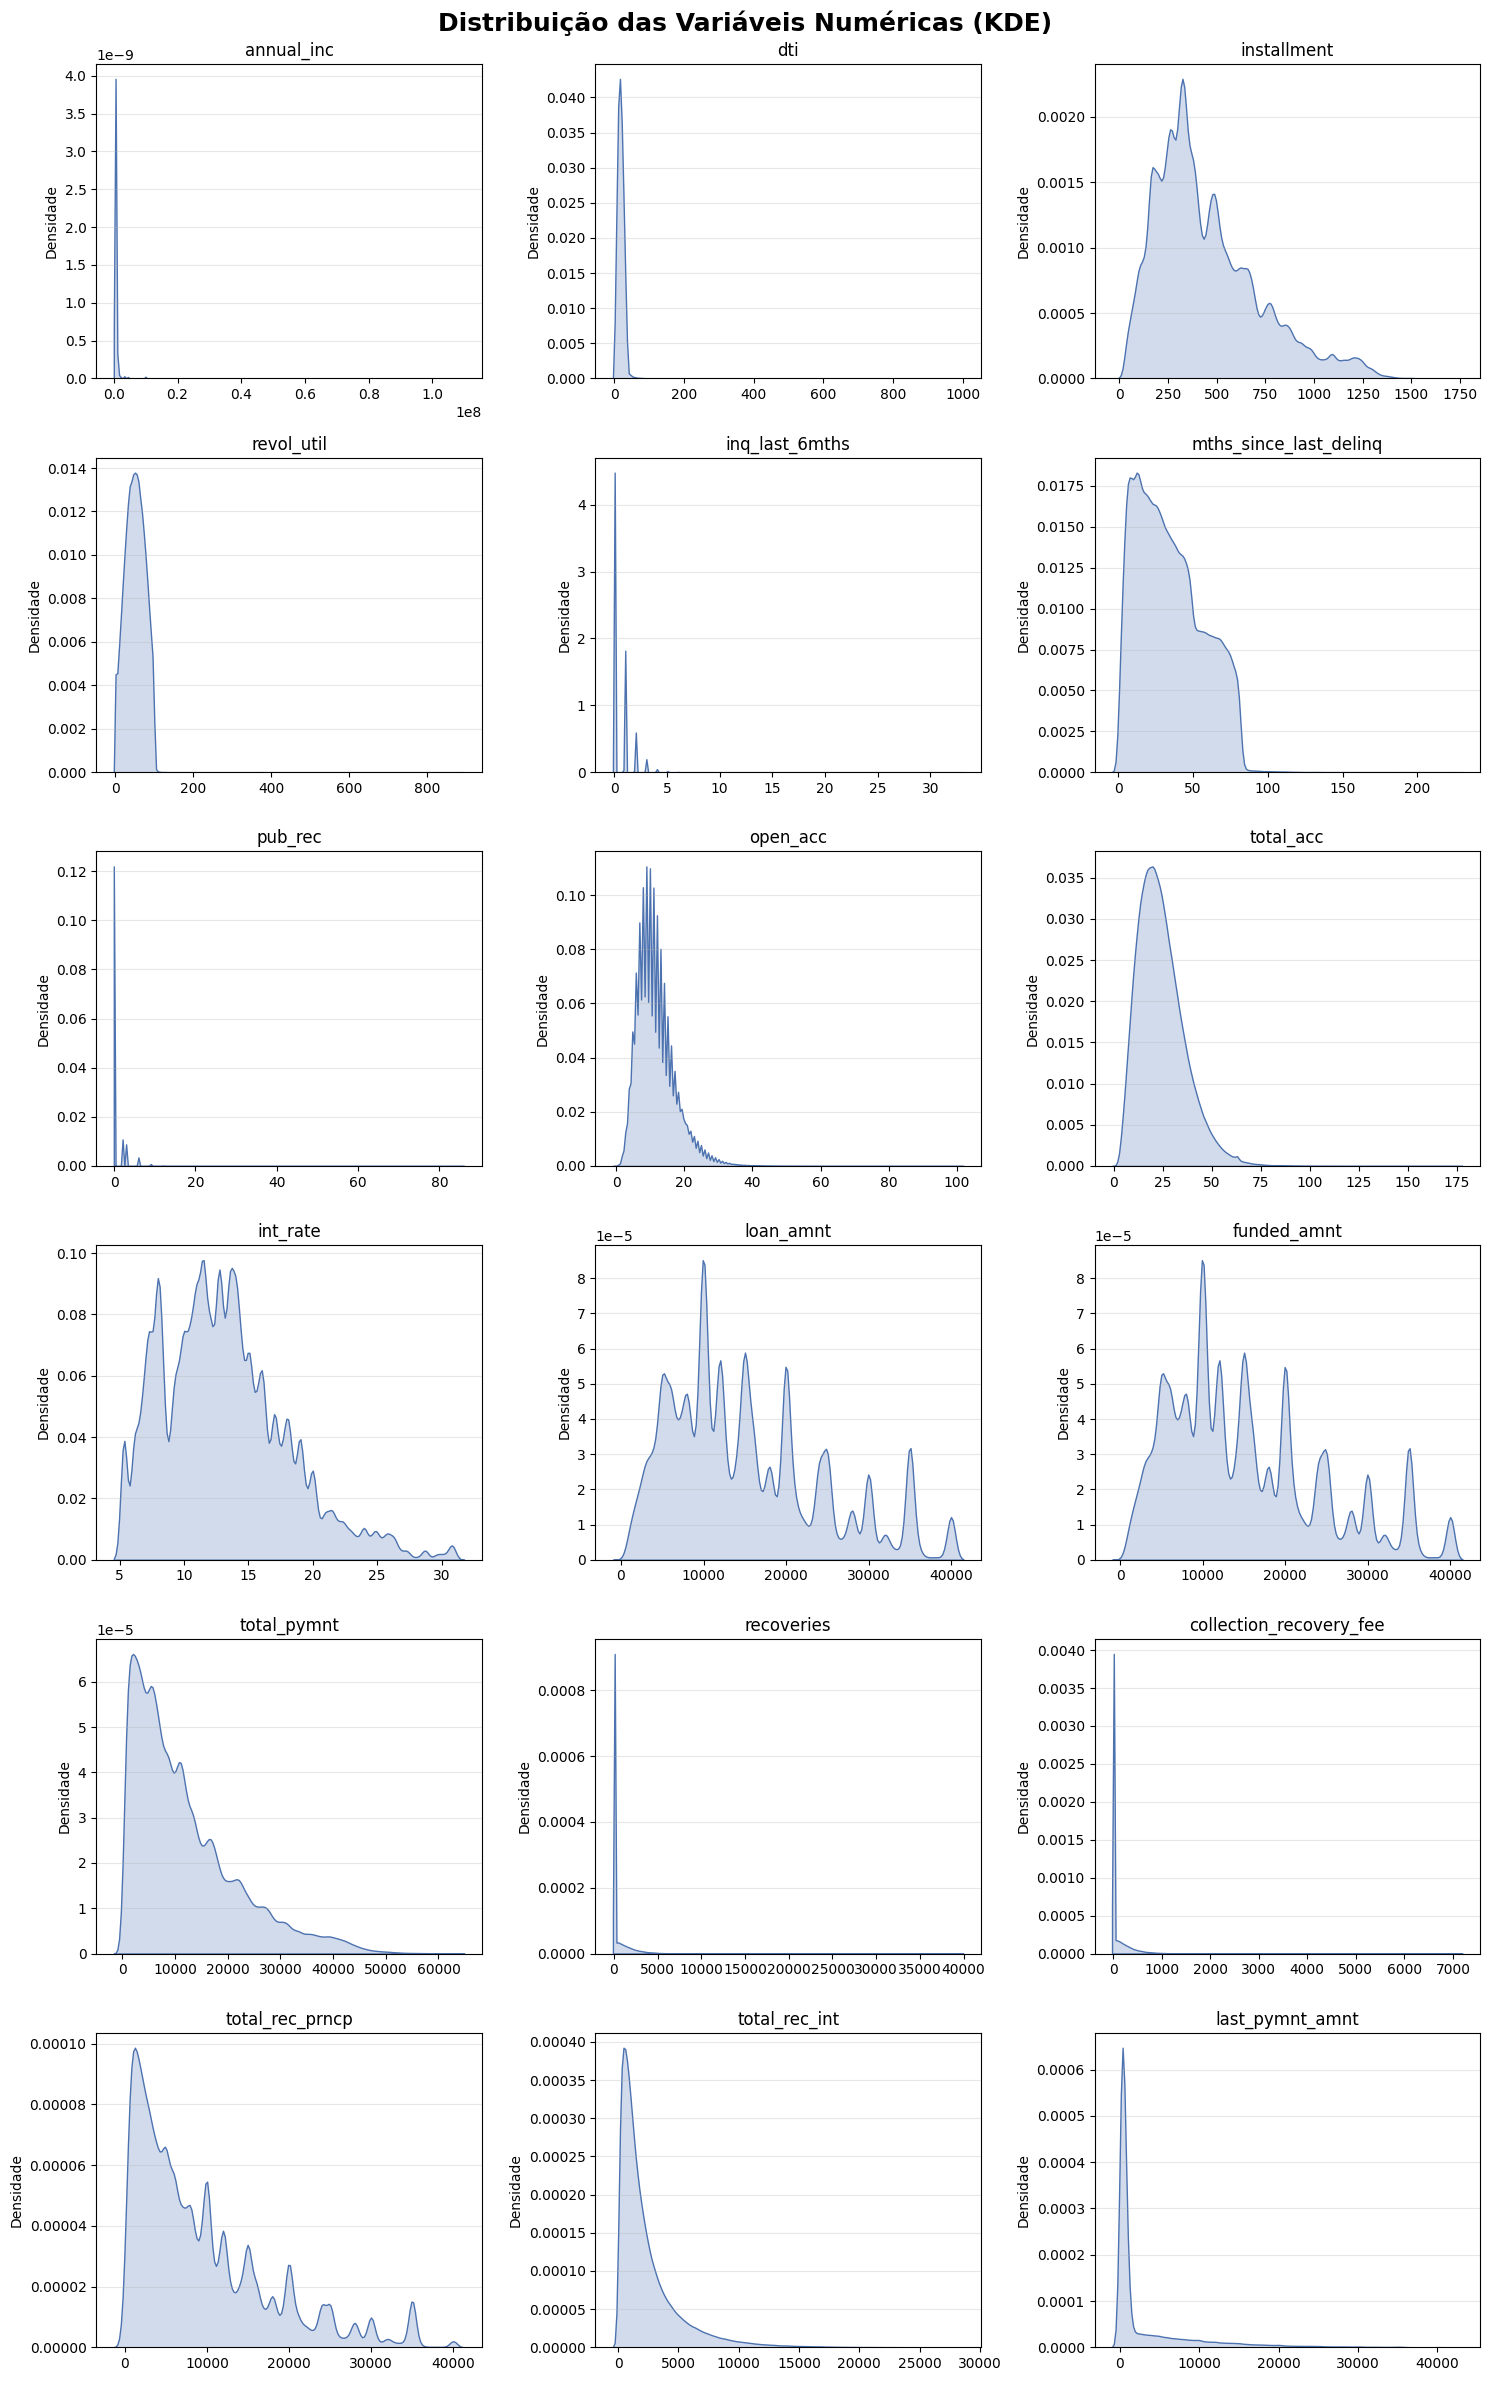

In [24]:
# Seleção de variáveis numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

num_plots = len(numeric_cols)
cols = 3 
rows = math.ceil(num_plots / cols)

# Configuração da figura
plt.figure(figsize=(15, 4 * rows))
plt.suptitle("Distribuição das Variáveis Numéricas (KDE)", fontsize=18, fontweight='bold', y=0.99)

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(x=df[col].dropna(), fill=True, color='#4c72b0')
    
    plt.title(col, fontsize=12)
    plt.xlabel("") 
    plt.ylabel("Densidade")
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Entendendo a distribuição das variáveis discretas e categóricas

Se as variáveis numéricas nos disseram quanto dinheiro está em jogo, as variáveis discretas e categóricas nos dizem quem está pegando esse dinheiro e para quê.

Entender a distribuição dessas categorias é vital. Um desequilíbrio aqui pode significar que o banco está exposto a riscos setoriais específicos que os números brutos, sozinhos, não conseguem mostrar. Vamos ver a "cara" do nosso cliente.

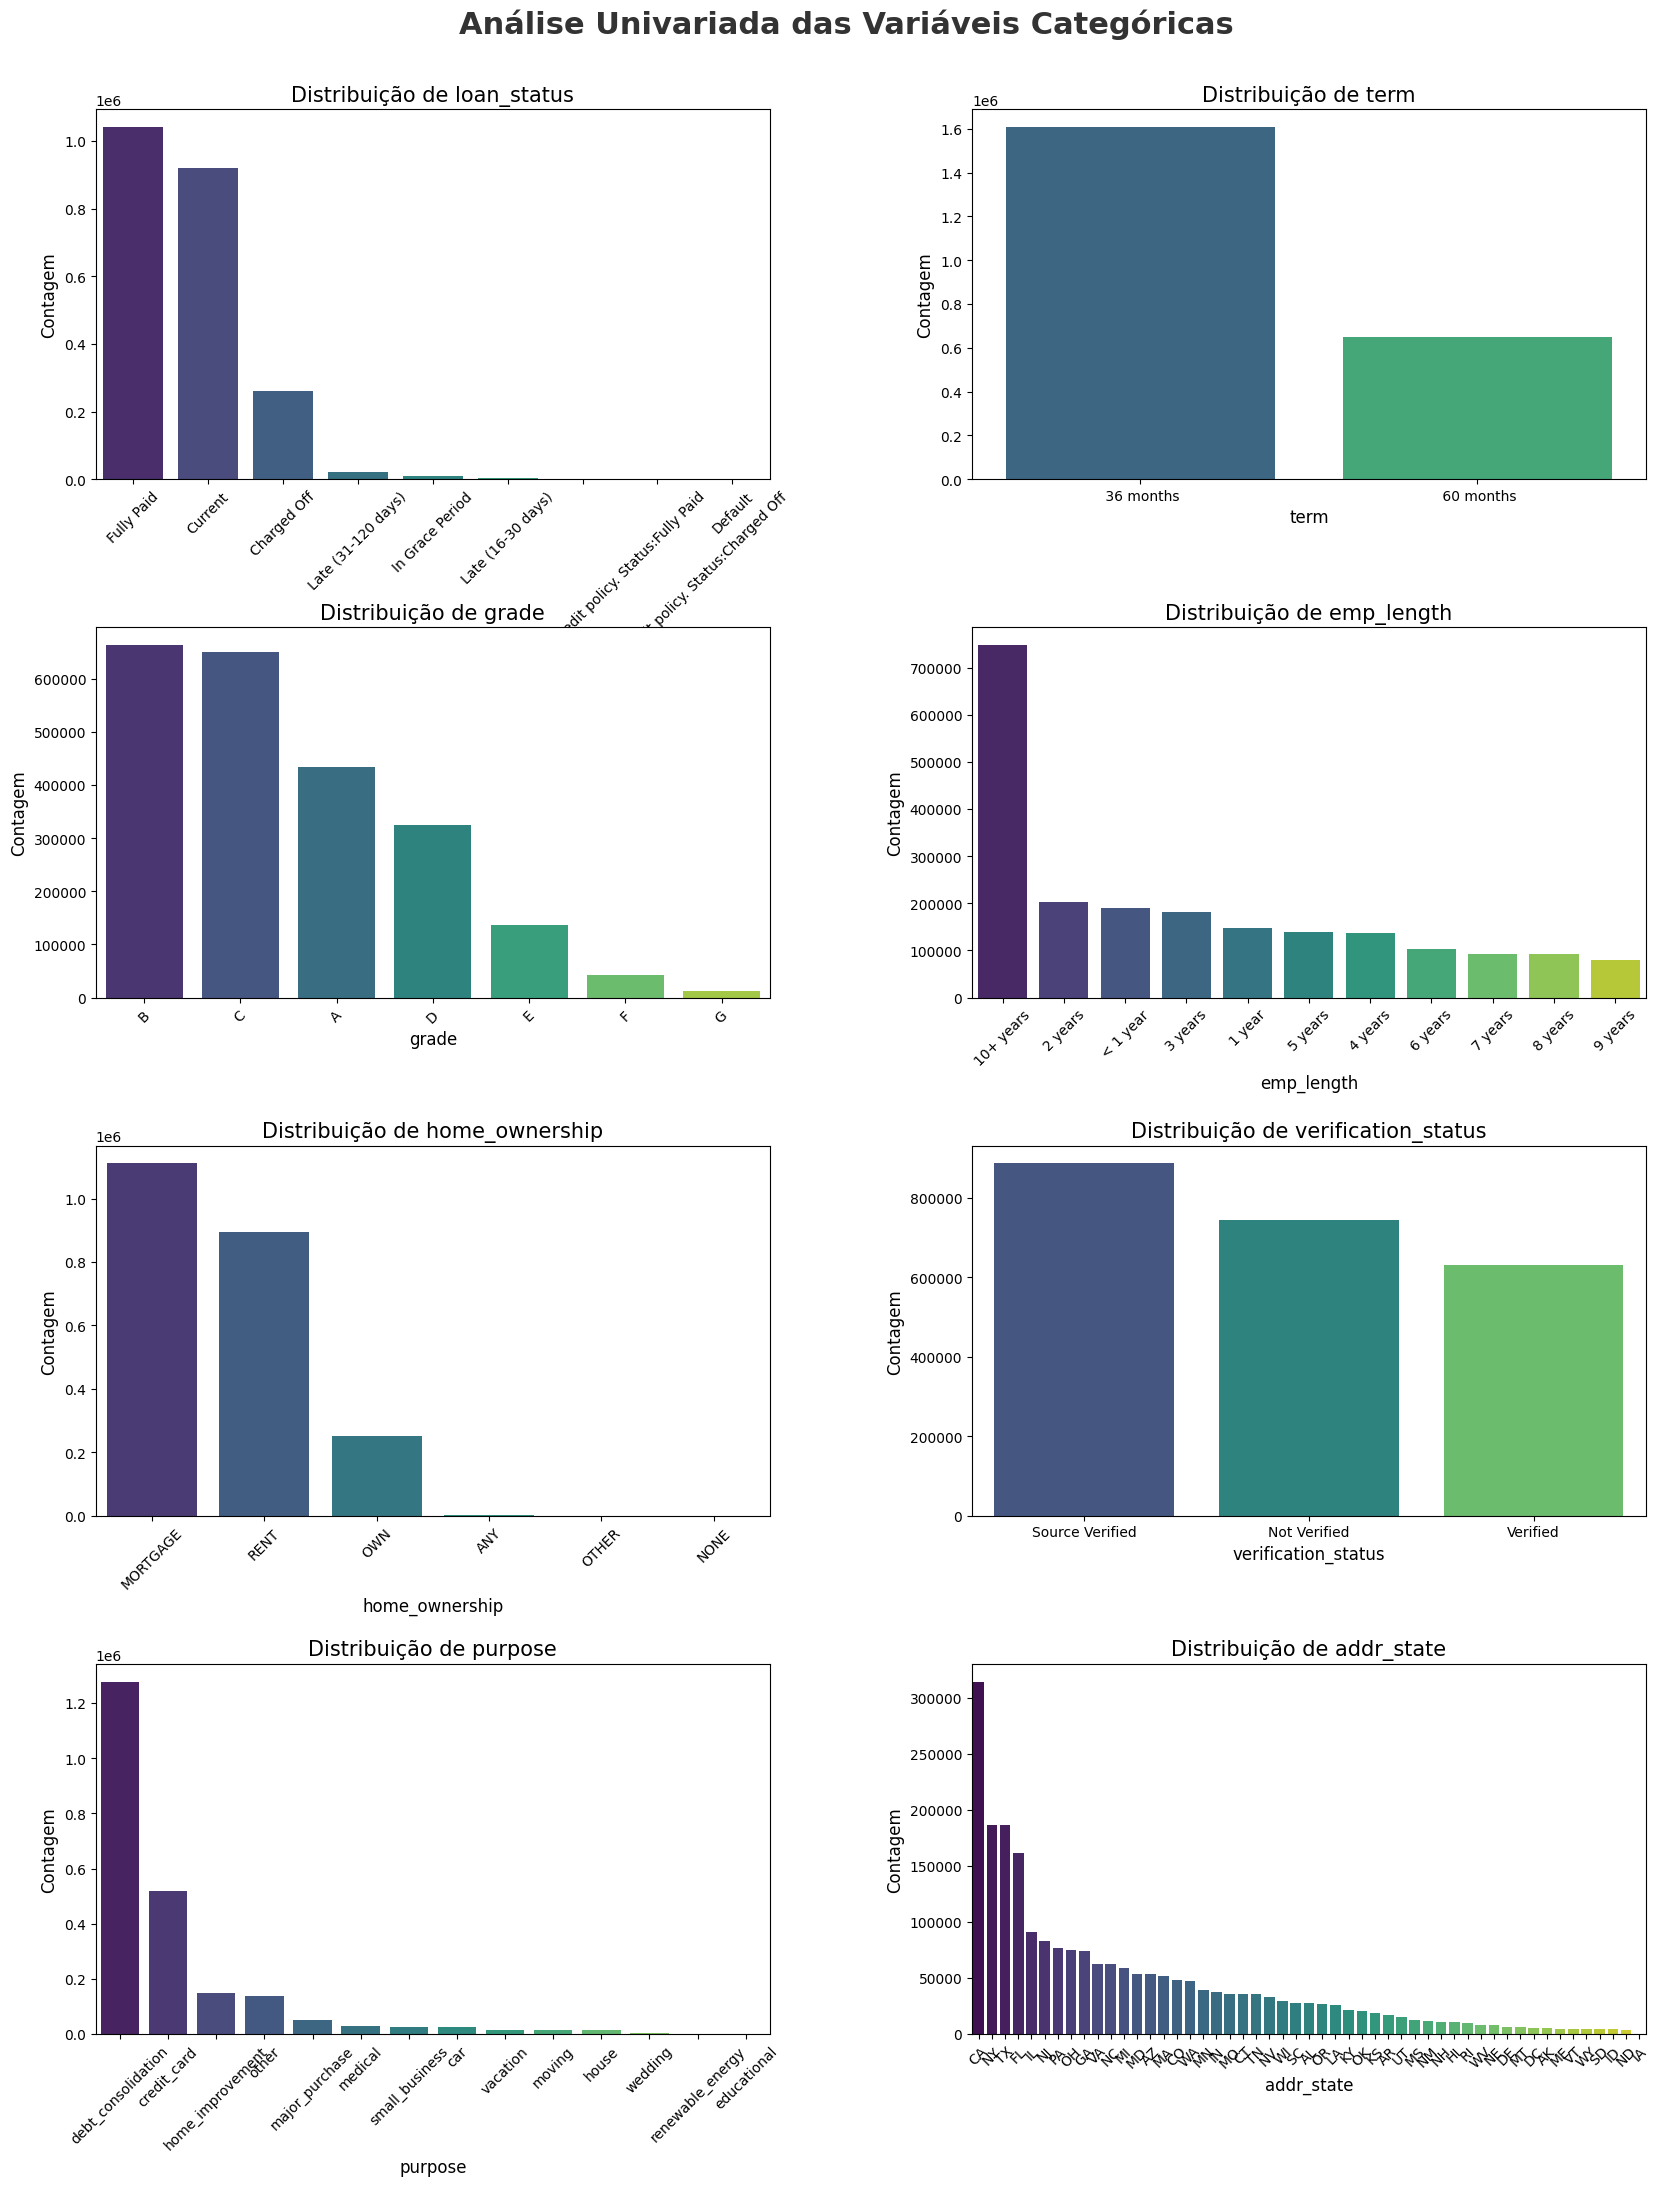

In [25]:
# Seleção de variáveis categóricas
cat_features = [
    'loan_status', 'term', 'grade', 'emp_length', 
    'home_ownership', 'verification_status', 'purpose', 'addr_state'
]

# Configuração da figura
plt.figure(figsize=(20, 25))
plt.suptitle("Análise Univariada das Variáveis Categóricas", fontsize=22, fontweight='bold', alpha=0.8, y=0.92)

for i, col in enumerate(cat_features):
    plt.subplot(4, 2, i + 1)
    
    # Ordenando as barras pela frequência para melhor visualização
    order = df[col].value_counts().index
    
    sns.countplot(data=df, x=col, order=order, palette='viridis')
    
    plt.title(f"Distribuição de {col}", fontsize=15)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Contagem", fontsize=12)
    
    # Rotacionar labels se houver muitas categorias
    if df[col].nunique() > 5:
        plt.xticks(rotation=45)
    
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

## Processo

Esta é a lei imutável da Ciência de Dados. Não importa quão sofisticado seja o modelo de Machine Learning ou quão elegante seja o dashboard; se a matéria-prima estiver contaminada, a conclusão será falha. A etapa de Processamento é onde a análise de dados deixa de ser uma simples coleta e se torna uma disciplina de engenharia.

Este é o momento de garantir a integridade. Estamos construindo a base sobre a qual todas as nossas decisões de crédito serão tomadas.

### Limpeza de dados

Nesta fase, vamos arregaçar as mangas para transformar dados brutos em um Analytical Dataset.

#### Definição do Escopo e Variável Alvo

No mundo real, a inadimplência não é binária; é um processo. Para esta análise, definimos a variável alvo (target) alinhada com as práticas de gestão de portfólio:
* Maus Pagadores (1): Empréstimos classificados como 'Charged Off', 'Default' ou atrasos severos que não atendem à política de crédito.
* Bons Pagadores (0): Empréstimos com status 'Fully Paid'.
* Exclusão Estratégica: Empréstimos com status 'Current' (em dia) foram segregados da modelagem preditiva de classificação. Incluí-los como 'bons' criaria um Viés de Censura, pois um empréstimo que está 'Current' hoje pode virar 'Default' amanhã. Eles serão analisados separadamente nas curvas de sobrevivência.

In [26]:
# Mantemos apenas quem já concluiu o ciclo do empréstimo para evitar o Viés de Censura
target_states = [
    'Fully Paid', 
    'Charged Off', 
    'Default',
    'Does not meet the credit policy. Status:Fully Paid',
    'Does not meet the credit policy. Status:Charged Off'
]

# Criamos df_cleaned para preservar o DataFrame original intacto
df_cleaned = df[df['loan_status'].isin(target_states)].copy()

# Definição da Target (Padrão de Mercado: 1 = Risco/Evento)
# Se contiver "Fully Paid", o alvo é 0 (Bom). Se não (Charged Off/Default), é 1 (Mau).
df_cleaned['target'] = np.where(df_cleaned['loan_status'].str.contains('Fully Paid'), 0, 1)

#### Prevenção de Vazamento de Dados

Um erro fatal na modelagem de risco é permitir que o modelo 'veja o futuro'. Variáveis como total_pymnt, recoveries ou last_pymnt_d contêm a resposta do problema. Se utilizadas na modelagem preditiva, elas gerariam uma acurácia artificialmente perfeita, mas inútil na prática.
A Solução Arquitetural: Para mitigar este risco, dividimos o dataset em dois fluxos de trabalho:
1. **df_risk:** Contém apenas dados disponíveis no momento da solicitação do crédito (Renda, Score, DTI, Finalidade). Será usado para os modelos de Application Score.
2. **df_finance:** Mantém os dados de pagamentos, recuperações e datas futuras. Será usado exclusivamente para o cálculo de Rentabilidade, LGD e Análise de Safra.

In [27]:
# Definimos as colunas de "vazamento"
leakage_cols = [
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
    'total_rec_int', 'total_rec_late_fee', 
    'recoveries', 'collection_recovery_fee', 
    'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'
]

# Criamos o df_finance (Foco em Rentabilidade/LGD/Vintage)
cols_finance = [
    'loan_status', 'target', 'loan_amnt', 'funded_amnt', 
    'issue_d', 'term', 'sub_grade', 'grade',  
    'int_rate', 'installment'                 
] + leakage_cols

# Garantir que pegamos apenas colunas que existem no df_cleaned
cols_finance = [c for c in cols_finance if c in df_cleaned.columns]

df_finance = df_cleaned[cols_finance].copy()

# Criamos o df_risk
df_risk = df_cleaned.drop(columns=leakage_cols, errors='ignore').copy()

#### Conversão e Limpeza de Tipos de Dados

Muitas vezes, bases de dados chegam formatadas para leitura humana, carregadas de símbolos (como % em taxas de juros ou a palavra years em prazos). Para o Python, entretanto, 12.5% não é um número: é um texto (string/object), tão incalculável quanto a palavra "banana".

Sem essa tradução, nossos dados são apenas palavras bonitas em uma tabela. Com ela, tornam-se insumos matemáticos prontos para análise.

In [28]:
# Usa Regex para extrair apenas os dígitos, ignorando espaços
# O uso de .strip() garante que não sobram espaços antes da conversão
df_finance['term'] = df_finance['term'].astype(str).str.extract(r'(\d+)').astype(float).astype(int)
df_risk['term'] = df_risk['term'].astype(str).str.extract(r'(\d+)').astype(float).astype(int)

cols_perc = ['int_rate', 'revol_util']
for col in cols_perc:
    # Remove '%' se for string
    if df_risk[col].dtype == 'object':
        df_risk[col] = df_risk[col].str.replace('%', '', regex=False).astype(float)
    
    # Divide por 100 apenas onde o valor é > 1
    mask_high = df_risk[col] > 1
    df_risk.loc[mask_high, col] = df_risk.loc[mask_high, col] / 100

# Formato '%b-%Y' (Ex: Dec-2018)
date_fmt = '%b-%Y'

# No df_risk
df_risk['issue_d'] = pd.to_datetime(df_risk['issue_d'], format=date_fmt, errors='coerce')
df_risk['earliest_cr_line'] = pd.to_datetime(df_risk['earliest_cr_line'], format=date_fmt, errors='coerce')

# No df_finance (Variáveis de performance/cálculo)
df_finance['issue_d'] = pd.to_datetime(df_finance['issue_d'], format=date_fmt, errors='coerce')
df_finance['last_pymnt_d'] = pd.to_datetime(df_finance['last_pymnt_d'], format=date_fmt, errors='coerce')

#### Tratando valores ausentes

Encontrar células vazias (NaN ou null) é inevitável em datasets reais. A reação instintiva de muitos analistas é simplesmente deletar essas linhas ou preenchê-las cegamente com a média. No entanto, essa abordagem pode ser catastrófica.

Um campo vazio nem sempre é um erro de sistema; ele pode ser um comportamento:

* Um cliente que deixa o campo Tempo de Emprego em branco pode estar escondendo desemprego recente.

* A falta de Taxa de Utilização pode indicar um cliente novo, sem histórico bancário.

Nesta etapa, adotaremos uma abordagem cirúrgica:

1. **Investigação:** O dado falta aleatoriamente ou existe um padrão?

2. **Estratégia de Inputação:** Para variáveis numéricas, preencher com a média/mediana distorce a distribuição? Para categóricas, devemos criar uma categoria "Desconhecido"?

Nosso objetivo é preservar a integridade da informação sem introduzir ruídos artificiais que "alucinem" uma estabilidade financeira que não existe.

In [29]:
df_risk.isna().sum()

loan_status                    0
issue_d                        0
term                           0
annual_inc                     4
dti                          312
verification_status            0
installment                    0
emp_length                 75491
emp_title                  82741
home_ownership                 0
purpose                        0
zip_code                       1
addr_state                     0
revol_util                   850
inq_last_6mths                30
mths_since_last_delinq    659032
pub_rec                       29
earliest_cr_line              29
open_acc                      29
total_acc                     29
grade                          0
sub_grade                      0
int_rate                       0
loan_amnt                      0
funded_amnt                    0
target                         0
dtype: int64

In [30]:
df_finance.isna().sum()

loan_status                   0
target                        0
loan_amnt                     0
funded_amnt                   0
issue_d                       0
term                          0
sub_grade                     0
grade                         0
int_rate                      0
installment                   0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d               2273
last_pymnt_amnt               0
dtype: int64

In [31]:
# Histórico de Delinquência
df_risk['never_delinq'] = np.where(df_risk['mths_since_last_delinq'].isna(), 1, 0)
df_risk['mths_since_last_delinq'].fillna(999, inplace=True)

# Tempo de Emprego (emp_length) - Limpeza e Categorização
def clean_emp_length(val):
    if pd.isna(val): return np.nan
    if '< 1 year' in val: return 0
    if '10+' in val: return 10
    digits = re.findall(r'\d+', val)
    return int(digits[0]) if digits else np.nan

df_risk['emp_length_int'] = df_risk['emp_length'].apply(clean_emp_length)
df_risk['emp_length_missing'] = np.where(df_risk['emp_length_int'].isna(), 1, 0)
df_risk['emp_length_int'].fillna(0, inplace=True)
df_risk.drop(columns=['emp_length'], inplace=True)

# Bureau de Crédito (Assumir ausência de eventos negativos)
cols_to_zero = ['pub_rec', 'inq_last_6mths', 'open_acc', 'total_acc']
df_risk[cols_to_zero] = df_risk[cols_to_zero].fillna(0)

# Tratamento de Taxas e Rendas (Mediana para evitar outliers)
if df_risk['revol_util'].dtype == 'object':
    df_risk['revol_util'] = df_risk['revol_util'].str.extract(r'(\d+\.?\d*)').astype(float)

df_risk['revol_util'].fillna(df_risk['revol_util'].median(), inplace=True)
df_risk['annual_inc'].fillna(df_risk['annual_inc'].median(), inplace=True)
df_risk['dti'].fillna(df_risk['dti'].median(), inplace=True)

# Criar coluna para cálculos de MOB (Months on Book)
# Se não houve pagamento, a data final é a data de início (MOB = 0)
df_finance['last_pymnt_d_calc'] = df_finance['last_pymnt_d'].fillna(df_finance['issue_d'])

# Criar coluna para exibição em relatórios
df_finance['last_pymnt_status'] = df_finance['last_pymnt_d'].dt.strftime('%Y-%m').fillna('No Payment')

#### Tratamento de Outliers

Modelos estatísticos amam a mediocridade, mas o mundo real é feito de extremos. Em nossa base, podemos encontrar desde erros de digitação óbvios até realidades financeiras legítimas, mas raras.

O perigo dos outliers não tratados é a Distorção da Realidade: um único valor extremo pode "puxar" a média e o desvio padrão, fazendo com que a análise indique regras enviesadas que não se aplicam à vasta maioria dos clientes.

Nesta etapa, faremos uma Triagem Estratégica:

1. **O Erro:** Valores impossíveis serão tratados como erro de dados.

2. **O Extremo Legítimo:** Para valores reais, mas muito distantes (ex: rendas milionárias), aplicaremos técnicas de Winsorization. Vamos limitar os valores extremos a um teto racional.

Isso acalma a variância dos dados, permitindo que a análise generalize melhor sem ser "sequestrado" pelas exceções.

In [32]:
# Preservar a riqueza, remover a distorção
limit_inc_99 = df_risk['annual_inc'].quantile(0.99)

# Substitui valores acima do P99 pelo valor do P99
df_risk['annual_inc'] = df_risk['annual_inc'].clip(upper=limit_inc_99)

initial_rows = len(df_risk)

# Detecção automática de escala
# Se o max for > 2, assumimos escala 0-100. Caso contrário, 0-1.
scale_factor = 100 if df_risk['dti'].max() > 5 else 1 
dti_limit = 100 if scale_factor == 100 else 1.0
revol_limit = 200 if scale_factor == 100 else 2.0

# Aplicação dos Filtros
# DTI > 100% é insolvência técnica ou erro
# Revol_Util > 200% é erro de sistema ou multa extrema
mask_clean = (df_risk['dti'] <= dti_limit) & (df_risk['revol_util'] <= revol_limit)

# Filtragem
df_risk = df_risk[mask_clean]
# Garante que o financeiro tenha as mesmas linhas do risco
df_finance = df_finance.loc[df_risk.index]

#### Engenharia de atributos (Feature Engineering)

Para superar as limitações das análises estáticas, transformamos dados temporais em métricas de ciclo de vida:
* **Safra:** Agrupamento por trimestre de originação para isolar a qualidade da concessão de choques macroeconômicos.
* **MOB:** Cálculo da idade do empréstimo mês a mês. Isso nos permite comparar a performance de um empréstimo concedido em 2015 com um de 2017 no mesmo estágio de maturação, eliminando distorções de crescimento da carteira.

In [33]:
# Usamos trimestres ('Q') para evitar ruído excessivo de safras mensais
df_finance['vintage_qt'] = df_finance['issue_d'].dt.to_period('Q').astype(str)
# Opcional: Safra Anual para visão macro
df_finance['vintage_yr'] = df_finance['issue_d'].dt.year.astype(str)

# Diferença em meses entre a última atividade e a emissão
df_finance['mob'] = (
    (df_finance['last_pymnt_d_calc'].dt.year - df_finance['issue_d'].dt.year) * 12 + 
    (df_finance['last_pymnt_d_calc'].dt.month - df_finance['issue_d'].dt.month)
)

# Aplica o lag de 4 meses para refletir a data real da parada de pagamento
mask_bad = df_finance['loan_status'].str.contains('Charged Off|Default', na=False)
df_finance.loc[mask_bad, 'mob'] += 4

# Em vez de limitar ao prazo do empréstimo,
# apenas garantimos que não existam MOBs negativos
df_finance['mob'] = df_finance['mob'].clip(lower=0)

# Sincronizar vintage com df_risk para análises futuras
df_risk['vintage_qt'] = df_finance['vintage_qt']

#### Categorização de Texto

Campos de texto livre, como Cargo/Profissão, são frequentemente descartados em modelos simples devido à sua "sujeira": existem milhares de maneiras de escrever "Engenheiro de Software". Para um algoritmo, cada variação é uma categoria diferente, gerando uma explosão de dimensionalidade que confunde a análise.

No entanto, descartar essa coluna seria desperdiçar ouro. Como vimos na análise exploratória, a profissão carrega um forte poder preditivo sobre a estabilidade financeira.

Nesta etapa, aplicaremos uma Normalização Semântica:

1. **Redução de Dimensionalidade:** Vamos varrer o texto em busca de palavras-chave para agrupar milhares de títulos únicos em macro-categorias lógicas.

2. **Captura de Valor:** Isso transforma um dado caótico e inutilizável em variáveis categóricas robustas, permitindo que a análise diferencie o risco de um "Funcionário Público" versus um "Autônomo" sem se perder nas nuances da grafia.

In [34]:
# Função de Mapeamento
def categorize_emp_title(title):
    if pd.isna(title):
        return 'Missing'
    
    title = str(title).lower()
    
    categories = {
        'Public Sector': ['police', 'officer', 'military', 'firefighter', 'government', 'govt', 'city', 'state', 'federal', 'army', 'navy', 'usps'],
        'Healthcare': ['nurse', 'doctor', 'hospital', 'medical', 'physician', 'rn', 'dentist', 'health', 'clinic', 'paramedic'],
        'Education': ['teacher', 'professor', 'school', 'university', 'instructor', 'academic', 'education', 'faculty', 'college'],
        
        'Tech/Eng': ['engineer', 'software', 'it', 'developer', 'systems', 'analyst', 'tech', 'data', 'computer', 'programmer'],
        'Finance/Legal': ['accountant', 'finance', 'lawyer', 'legal', 'banking', 'audit', 'attorney', 'cpa'],
        
        'Self-Employed': ['owner', 'partner', 'president', 'ceo', 'founder', 'consultant', 'self', 'business'],
        
        'Management': ['manager', 'director', 'supervisor', 'lead', 'vp', 'executive', 'chief', 'head', 'principal'],
        'Service/Retail': ['sales', 'retail', 'clerk', 'cashier', 'customer', 'driver', 'truck', 'store', 'restaurant', 'food', 'waiter'],
        'Blue Collar': ['labor', 'construction', 'warehouse', 'operator', 'assembler', 'machinist'] # Adicionado para capturar setor manual
    }
    
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
            
    return 'Other'

# Aplicação
df_risk['emp_sector'] = df_risk['emp_title'].apply(categorize_emp_title)

sector_dist = df_risk['emp_sector'].value_counts(normalize=True) * 100

df_risk.drop(columns=['emp_title'], inplace=True)

#### Remoção de linhas residuais

Os valores nulos restantes são residuais e estatisticamente insignificantes dado o volume total de dados.

Como as linhas problemáticas representam aproximadamente 0.001% do dataset, a melhor prática é removê-las.

In [35]:
df_risk.isna().sum()

loan_status                0
issue_d                    0
term                       0
annual_inc                 0
dti                        0
verification_status        0
installment                0
home_ownership             0
purpose                    0
zip_code                   1
addr_state                 0
revol_util                 0
inq_last_6mths             0
mths_since_last_delinq     0
pub_rec                    0
earliest_cr_line          29
open_acc                   0
total_acc                  0
grade                      0
sub_grade                  0
int_rate                   0
loan_amnt                  0
funded_amnt                0
target                     0
never_delinq               0
emp_length_int             0
emp_length_missing         0
vintage_qt                 0
emp_sector                 0
dtype: int64

In [36]:
# Remover as linhas residuais com nulos
df_risk.dropna(subset=['zip_code', 'earliest_cr_line'], inplace=True)

# Sincronizar o df_finance
# para manter o alinhamento 1:1 para análise de rentabilidade futura
df_finance = df_finance.loc[df_risk.index]

### Análise de Poder Preditivo (Pré-Scorecard)

Temos dezenas de colunas à disposição, mas na modelagem de risco de crédito, menos é mais. Uma análise cheia com variáveis fracas ou redundantes não apenas perde performance; ela se torna uma "caixa preta" difícil de explicar para a auditoria e perigosa para o negócio.

Nesta etapa, realizamos uma Auditoria de Sinal. Vamos submeter cada variável candidata a testes estatísticos rigorosos, focados no Information Value (IV) e Weight of Evidence (WoE), para responder a uma pergunta simples: "Esta variável consegue distinguir um bom pagador de um mau pagador?"

Nosso objetivo é:

1. **Filtrar o Ruído:** Descartar variáveis com baixo poder preditivo que não ajudam na decisão.

2. **Eliminar Redundância:** Identificar variáveis que dizem a mesma coisa e ficar apenas com a mais robusta.

3. **Garantir Monotonicidade:** Verificar se a relação da variável com o risco é lógica e estável, fundamental para a construção de Scorecards tradicionais.

$$WoE_i = \ln \left( \frac{\% \text{Good}_i}{\% \text{Bad}_i} \right)$$

$$IV = \sum_{i=1}^{n} \left[ (\% \text{Good}_i - \% \text{Bad}_i) \times \ln \left( \frac{\% \text{Good}_i}{\% \text{Bad}_i} \right) \right]$$

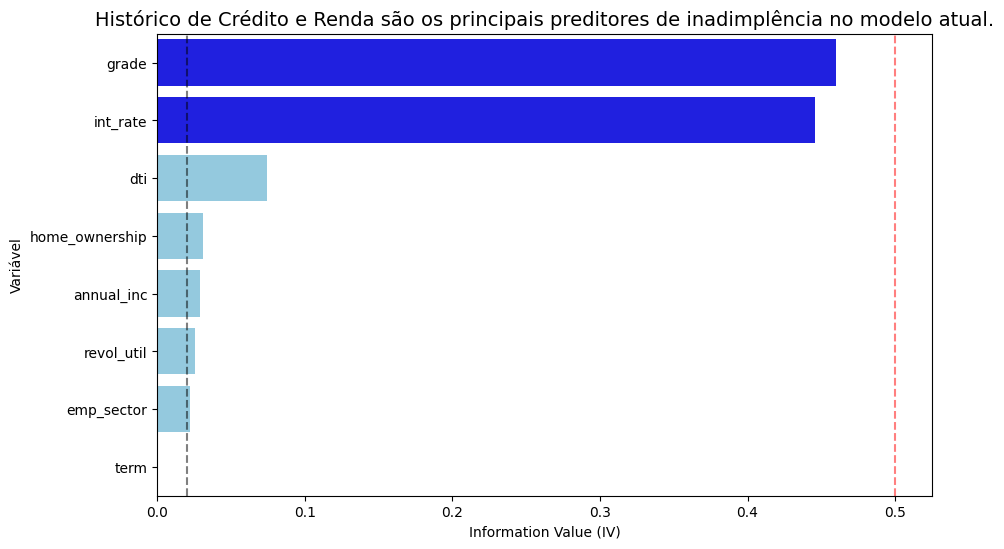

In [37]:
def calculate_woe_iv(df, feature, target):
    lst = []
    df = df.copy()
    
    if np.issubdtype(df[feature].dtype, np.number):
        try:
            df['bin'] = pd.qcut(df[feature], q=10, duplicates='drop').astype(str)
        except:
            df['bin'] = pd.cut(df[feature], bins=10).astype(str)
    else:
        # Preenche nulos como 'Missing'
        df[feature] = df[feature].fillna('Missing')
        df['bin'] = df[feature].astype(str)

    grouped = df.groupby('bin', observed=False)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'Total', 'sum': 'Bad'})
    grouped['Good'] = grouped['Total'] - grouped['Bad']
    
    # Suavização para evitar divisão por zero no Log
    grouped['Good'] = np.where(grouped['Good'] == 0, 0.5, grouped['Good'])
    grouped['Bad'] = np.where(grouped['Bad'] == 0, 0.5, grouped['Bad'])
    
    total_goods = grouped['Good'].sum()
    total_bads = grouped['Bad'].sum()
    
    grouped['Distr_Good'] = grouped['Good'] / total_goods
    grouped['Distr_Bad'] = grouped['Bad'] / total_bads
    
    # Fórmula do WoE: ln(Distr_Good / Distr_Bad)
    grouped['WoE'] = np.log(grouped['Distr_Good'] / grouped['Distr_Bad'])
    
    # Fórmula do IV: (Distr_Good - Distr_Bad) * WoE
    grouped['IV'] = (grouped['Distr_Good'] - grouped['Distr_Bad']) * grouped['WoE']
    
    # Retorna a tabela detalhada e o IV total da variável
    return grouped, grouped['IV'].sum()

# Selecionamos variáveis candidatas
candidate_vars = ['grade', 'int_rate', 'dti', 'annual_inc', 'revol_util', 
                  'emp_sector', 'term', 'home_ownership']

iv_results = []

for col in candidate_vars:
    if col in df_risk.columns:
        _, iv = calculate_woe_iv(df_risk, col, 'target')
        iv_results.append({'Variável': col, 'IV': iv})

# Cria DataFrame de resultados ordenado
df_iv = pd.DataFrame(iv_results).sort_values(by='IV', ascending=False)

plt.figure(figsize=(10, 6))

# Cores baseadas na "Regra de Siddiqi"
# < 0.02: Inútil (Cinza)
# 0.02 - 0.1: Fraco (Azul Claro)
# 0.1 - 0.3: Médio (Azul Escuro)
# 0.3 - 0.5: Forte (Verde)
# > 0.5: Suspeito (Vermelho)
colors = []
for iv in df_iv['IV']:
    if iv < 0.02: colors.append('lightblue')
    elif iv < 0.1: colors.append('skyblue')
    elif iv < 0.3: colors.append('steelblue')
    elif iv < 0.5: colors.append('blue')
    else: colors.append('firebrick')

sns.barplot(data=df_iv, x='IV', y='Variável', palette=colors)
plt.title('Histórico de Crédito e Renda são os principais preditores de inadimplência no modelo atual.', fontsize=14)
plt.xlabel('Information Value (IV)')
plt.axvline(0.02, color='black', linestyle='--', alpha=0.5)
plt.axvline(0.5, color='red', linestyle='--', alpha=0.5)
plt.show()

In [38]:
df_iv

,Variável,IV
0,grade,0.46
1,int_rate,0.45
2,dti,0.07
7,home_ownership,0.03
3,annual_inc,0.03
4,revol_util,0.03
5,emp_sector,0.02
6,term,0.00


## Analisar

Até agora, organizamos o passado. Agora, vamos colocar a mão na massa.

Já temos dados limpos, tipados e tratados. Mas uma tabela organizada não toma decisões. Nesta fase de Análise, deixamos de ser "faxineiros de dados" para nos tornarmos Investigadores de Padrões.

Não estamos mais procurando por erros de digitação; estamos procurando por comportamentos. Vamos cruzar variáveis para responder às perguntas.

Aqui é onde transformamos intuição em estatística e dados em estratégia. O que descobriremos a seguir será o "cérebro" das nossas futuras recomendações.

**Por que estou fazendo este gráfico?**

Em finanças, buscar rendimento sem medir a perda é uma armadilha comum. Um empréstimo com taxa de juros de 30% parece atraente, mas se 40% desses clientes não pagarem, o banco quebra. Meu objetivo aqui foi desafiar a premissa de que 'maior risco traz maior retorno'. Precisamos encontrar o Retorno Líquido Anualizado (NAR) real de cada segmento, descontando as perdas efetivas, para responder à pergunta: Estamos sendo pagos adequadamente pelo risco que estamos assumindo nos Grades F e G, ou estamos destruindo valor?

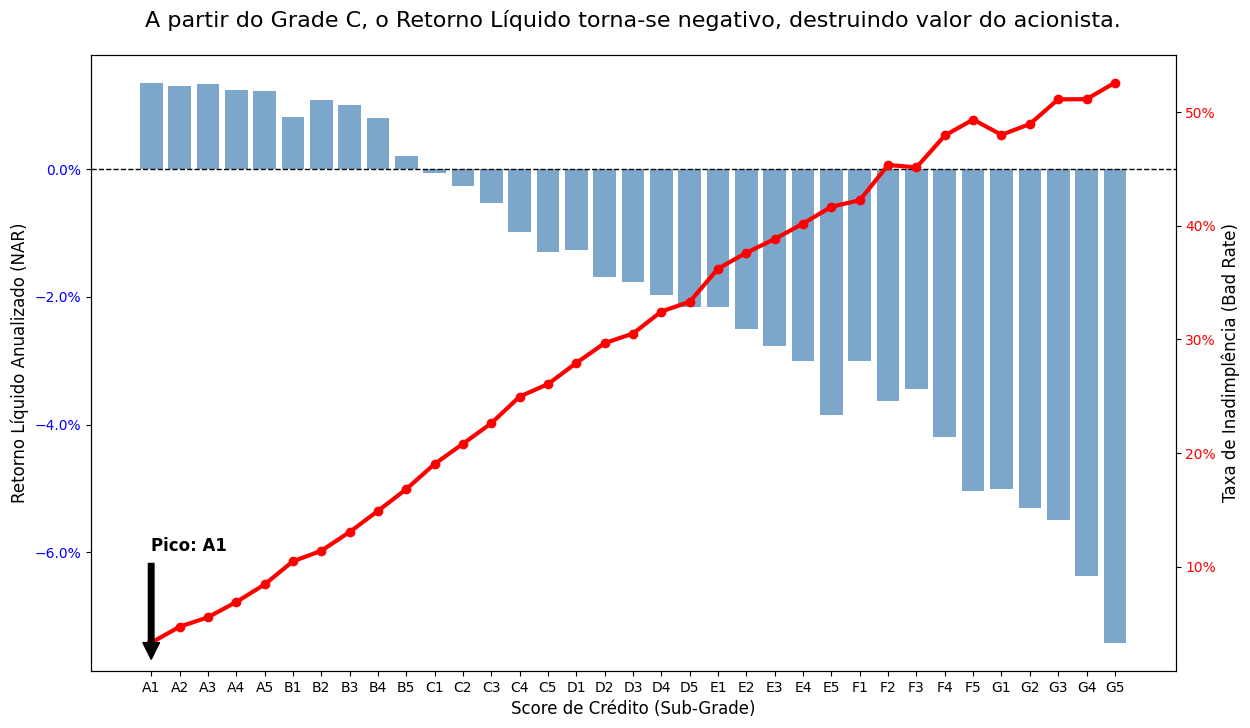

In [39]:
# NAR = (1 + ROI_Simples) ^ (12 / Prazo_Meses) - 1

df_finance['term'] = df_risk['term']

df_calc = df_finance.copy()

# Cálculo do ROI Simples (Lucro / Investimento)
df_calc['roi_simple'] = (df_calc['total_pymnt'] - df_calc['funded_amnt']) / df_calc['funded_amnt']

# Cálculo do NAR (Ajuste temporal)
df_calc['nar'] = (1 + df_calc['roi_simple']) ** (12 / df_calc['term']) - 1

# Agrupamos para encontrar a média de Retorno e a Taxa de Inadimplência (Risk vs Reward)
profit_analysis = df_calc.groupby('sub_grade', observed=False).agg(
    avg_nar=('nar', 'mean'),
    bad_rate=('target', 'mean'), # target: 1 = Default, 0 = Paid
    volume=('funded_amnt', 'count'),
    avg_int_rate=('int_rate', 'mean')
).reset_index()

# Ordenar por Subgrade (A1 -> G5)
profit_analysis = profit_analysis.sort_values('sub_grade')

fig, ax1 = plt.subplots(figsize=(14, 8))

bars = ax1.bar(profit_analysis['sub_grade'], profit_analysis['avg_nar'], 
               color='steelblue', alpha=0.7, label='Retorno Líquido (NAR)')

ax1.set_xlabel('Score de Crédito (Sub-Grade)', fontsize=12)
ax1.set_ylabel('Retorno Líquido Anualizado (NAR)', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Adicionar linha de referência zero
ax1.axhline(0, color='black', linewidth=1, linestyle='--')

# Gráfico de Linha: Taxa de Inadimplência (Eixo da Direita)
ax2 = ax1.twinx()
line = ax2.plot(profit_analysis['sub_grade'], profit_analysis['bad_rate'], 
                color='red', marker='o', linewidth=3, label='Bad Rate (Risco)')

ax2.set_ylabel('Taxa de Inadimplência (Bad Rate)', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Título e Legendas
plt.title('A partir do Grade C, o Retorno Líquido torna-se negativo, destruindo valor do acionista.', fontsize=16, pad=20)

# Destaque do "Ponto de Virada"
max_nar_idx = profit_analysis['avg_nar'].idxmax()
best_grade = profit_analysis.loc[max_nar_idx, 'sub_grade']
max_nar_val = profit_analysis.loc[max_nar_idx, 'avg_nar']

plt.annotate(f'Pico: {best_grade}',
             xy=(max_nar_idx, max_nar_val),
             xytext=(max_nar_idx, max_nar_val + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, fontweight='bold')

plt.show()

In [40]:
profit_analysis[['sub_grade', 'avg_int_rate', 'bad_rate', 'avg_nar']].head(10)

,sub_grade,avg_int_rate,bad_rate,avg_nar
0,A1,5.55,0.03,0.01
1,A2,6.52,0.05,0.01
2,A3,7.12,0.06,0.01
3,A4,7.51,0.07,0.01
4,A5,8.21,0.08,0.01
5,B1,8.91,0.10,0.01
6,B2,9.92,0.11,0.01
7,B3,10.76,0.13,0.01
8,B4,11.51,0.15,0.01
9,B5,12.02,0.17,0.00


**O que este gráfico nos diz?**

Ao descontar as perdas efetivas para encontrar o Retorno Líquido Anualizado, identificamos uma falha crítica na precificação de risco. Contrariando a premissa de que maior risco compensa com maior retorno, os dados mostram que a rentabilidade real é maximizada exclusivamente no Grade A.

O ponto de inflexão é alarmante: a partir do Grade C, a inadimplência corrói inteiramente o prêmio de juros, resultando em destruição de valor. Isso significa que os lucros gerados pelos clientes 'Prime' estão subsidiando o prejuízo estrutural de aproximadamente 70% da carteira. A ação recomendada não é apenas restringir F e G, mas revisar imediatamente a política de crédito a partir do Grade C, onde a operação já se torna deficitária.

**Por que estou fazendo este gráfico?**

Métricas estáticas de inadimplência mentem quando a carteira está crescendo. O aumento no volume de vendas novas infla o denominador, mascarando problemas na originação. Para eliminar esse ruído, apliquei a Análise de Safra, considerada o 'Padrão Ouro' na gestão de risco. Ao agrupar empréstimos pela data de originação e rastrear seu desempenho por idade, isolo a qualidade real da concessão de crédito, independentemente do crescimento da carteira.

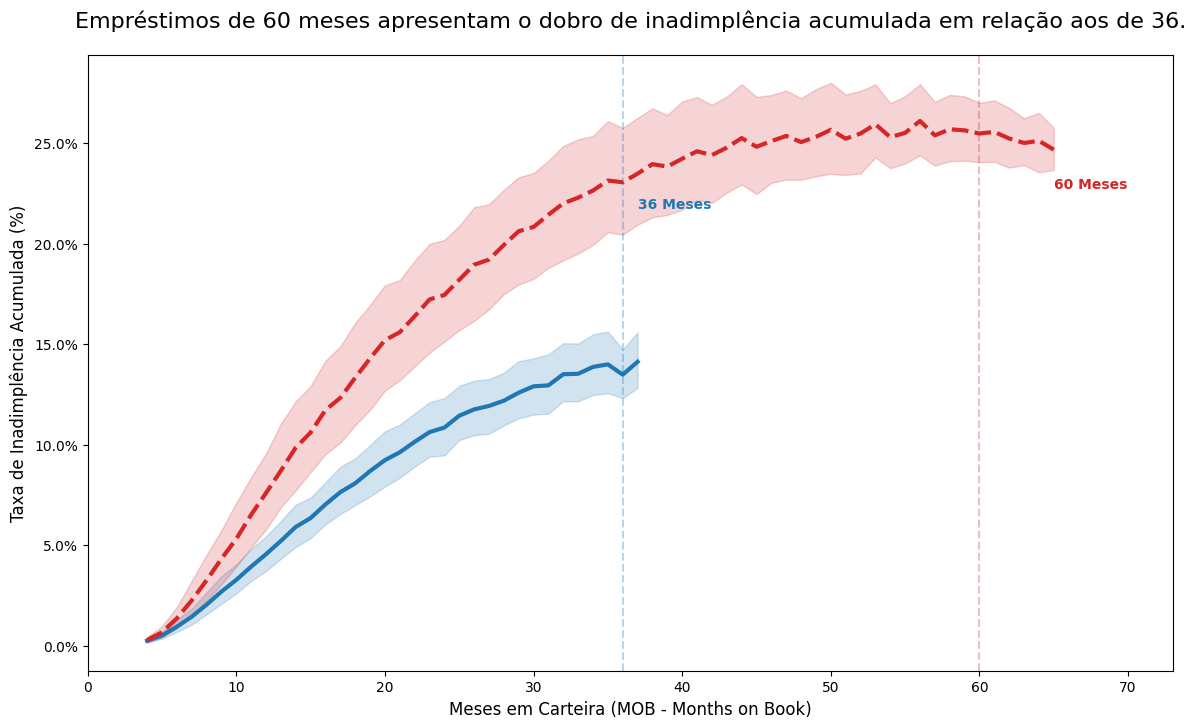

In [41]:
cohort_sizes = df_finance.groupby(['vintage_qt', 'term'])['loan_amnt'].count().reset_index()
cohort_sizes.rename(columns={'loan_amnt': 'orig_count'}, inplace=True)

defaults_by_mob = df_finance[df_finance['target'] == 1].groupby(
    ['vintage_qt', 'term', 'mob']
)['loan_amnt'].count().reset_index()
defaults_by_mob.rename(columns={'loan_amnt': 'bad_count'}, inplace=True)

vintage_curve = defaults_by_mob.merge(cohort_sizes, on=['vintage_qt', 'term'])

vintage_curve.sort_values(['term', 'vintage_qt', 'mob'], inplace=True)

vintage_curve['cum_bad_count'] = vintage_curve.groupby(['vintage_qt', 'term'])['bad_count'].cumsum()
vintage_curve['cum_bad_rate'] = vintage_curve['cum_bad_count'] / vintage_curve['orig_count']

mask_36 = (vintage_curve['term'] == 36) & (vintage_curve['mob'] <= 37)

mask_60 = (vintage_curve['term'] == 60) & (vintage_curve['mob'] <= 65)

vintage_curve_view = vintage_curve[mask_36 | mask_60]


plt.figure(figsize=(14, 8))

ax = sns.lineplot(
    data=vintage_curve_view, 
    x='mob', 
    y='cum_bad_rate', 
    hue='term', 
    style='term',
    palette=['#1f77b4', '#d62728'], 
    linewidth=3,
    legend=False
)

plt.title('Empréstimos de 60 meses apresentam o dobro de inadimplência acumulada em relação aos de 36.', fontsize=16, pad=20)
plt.xlabel('Meses em Carteira (MOB - Months on Book)', fontsize=12)
plt.ylabel('Taxa de Inadimplência Acumulada (%)', fontsize=12)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Linhas verticais de referência
plt.axvline(36, color='#1f77b4', linestyle='--', alpha=0.3)
plt.axvline(60, color='#d62728', linestyle='--', alpha=0.3)

for term, color in zip([36, 60], ['#1f77b4', '#d62728']):
    subset = vintage_curve_view[vintage_curve_view['term'] == term]
    last_mob = subset['mob'].max()
    last_rate = subset[subset['mob'] == last_mob]['cum_bad_rate'].values[0]
    
    plt.text(
        last_mob,
        last_rate, 
        f'{term} Meses', 
        color=color, 
        fontweight='bold',
        va='center',
        ha='left'
    )

plt.xlim(0, vintage_curve_view['mob'].max() + 8)

plt.show()

In [42]:
compare_36m = vintage_curve_view[vintage_curve_view['mob'] == 36].groupby('term')['cum_bad_rate'].mean()
compare_36m_df = compare_36m.to_frame(name='Taxa de Inadimplência Acumulada (Mês 36)')
compare_36m_df.style.format('{:.2%}')

,Taxa de Inadimplência Acumulada (Mês 36)
term,
36,13.49%
60,23.06%


**O que este gráfico nos diz?**

A Análise de Safra expõe um problema claro de Seleção Adversa. Ao isolar o desempenho por data de originação, observamos que o produto de 60 meses atrai um perfil de cliente fundamentalmente mais frágil do que o de 36 meses.

A divergência é estrutural: enquanto a inadimplência da carteira de 36 meses tende a estabilizar após o 24º mês de vida, a curva de 60 meses mantém uma trajetória ascendente contínua, acumulando perdas por um período muito maior sem sinal de recuperação. Isso comprova que o prazo estendido não está auxiliando a capacidade de pagamento, mas sim mascarando o risco inicial. A recomendação estratégica é endurecer os critérios de entrada especificamente para solicitações de longo prazo.

**Por que estou fazendo este gráfico?**

Muitos modelos financeiros assumem ingenuamente que, quando um cliente falha, perderemos uma 'média' fixa do valor. No entanto, a realidade da recuperação de crédito raramente é suave. Construí este histograma de distribuição de LGD para testar a hipótese de bimodalidade. Precisamos saber se existe uma 'rede de segurança' na recuperação ou se estamos lidando com um cenário binário de 'tudo ou nada', o que alteraria drasticamente nossa necessidade de provisionamento de capital.

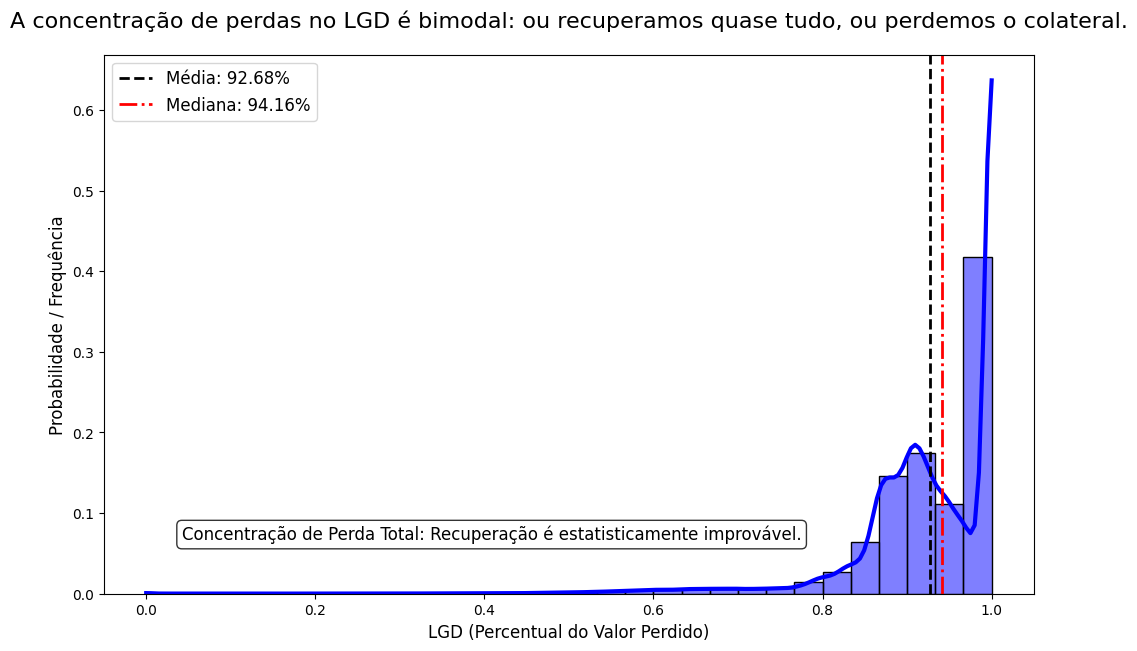

In [43]:
# Filtramos apenas os empréstimos que já deram Default/Charge Off
# LGD só existe se houver o evento de inadimplência (Target = 1)
df_lgd = df_finance[df_finance['target'] == 1].copy()

# Fórmula: LGD = 1 - (Valor Recuperado / Valor da Exposição)
# Nota: Em dados reais, a EAD (Exposure at Default) seria o saldo devedor na data do default.
# Como proxy conservador para Lending Club, usamos o funded_amnt ou (funded - principal_pago).

# Taxa de Recuperação
df_lgd['recovery_rate'] = df_lgd['recoveries'] / df_lgd['funded_amnt']

# Tratamento de Limites 
# Recuperação > 1.0 pode ocorrer devido a multas/juros, mas para LGD limitamos a 0 e 1.
df_lgd['recovery_rate'] = df_lgd['recovery_rate'].clip(0, 1)

df_lgd['LGD'] = 1 - df_lgd['recovery_rate']

plt.figure(figsize=(12, 7))

# Histograma com KDE
sns.histplot(
    data=df_lgd, 
    x='LGD', 
    bins=30, 
    kde=True, 
    color='blue', 
    stat='probability',
    line_kws={'linewidth': 3}
)

mean_lgd = df_lgd['LGD'].mean()
median_lgd = df_lgd['LGD'].median()

plt.axvline(mean_lgd, color='black', linestyle='--', linewidth=2, label=f'Média: {mean_lgd:.2%}')
plt.axvline(median_lgd, color='red', linestyle='-.', linewidth=2, label=f'Mediana: {median_lgd:.2%}')

plt.title('A concentração de perdas no LGD é bimodal: ou recuperamos quase tudo, ou perdemos o colateral.', fontsize=16, pad=20)
plt.xlabel('LGD (Percentual do Valor Perdido)', fontsize=12)
plt.ylabel('Probabilidade / Frequência', fontsize=12)
plt.legend(fontsize=12)

plt.annotate('Concentração de Perda Total: Recuperação é estatisticamente improvável.',
             xy=(0.75, 0.10), 
             xycoords='axes fraction',
             ha='right', fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8))

plt.show()

In [44]:
lgd_summary = df_lgd['LGD'].describe().to_frame(name='Estatísticas de Severidade (LGD)')

lgd_summary.loc['Perda Total (LGD > 90%)'] = (df_lgd['LGD'] > 0.9).mean()

lgd_summary.style.format(lambda x: f"{x:,.0f}" if x > 100 else f"{x:.2%}") \
                 .background_gradient(cmap='Blues', subset=pd.IndexSlice[['mean', '50%', 'max'], :])

,Estatísticas de Severidade (LGD)
count,"262,317"
mean,92.68%
std,9.40%
min,0.00%
25%,88.97%
50%,94.16%
75%,100.00%
max,100.00%
Perda Total (LGD > 90%),70.39%


**O que este gráfico nos diz?**

A Ilusão da Média na Recuperação "A distribuição de LGD derruba a hipótese de uma recuperação média suave. Observamos uma concentração massiva de perdas próximas a 100%, com uma mediana de 94.16%.

Diferente de carteiras colateralizadas que apresentam comportamento bimodal, este portfólio demonstra uma irreversibilidade do default. Uma vez que o cliente entra em inadimplência, a probabilidade de recuperação significativa é quase nula. Isso invalida estratégias tradicionais de cobrança tardia e reforça a tese de que a rentabilidade depende inteiramente da filtragem na entrada, pois não há 'segunda chance' operacional.

**Por que estou fazendo este gráfico?**

O mercado muda, e o perfil do cliente também. Um modelo treinado com dados de 2015 pode ser inútil em 2024 se a população mudou. Calculei o Population Stability Index (PSI) para as principais variáveis de risco. O objetivo é garantir a governança do modelo: identificar se houve mudanças estruturais na base de clientes que invalidariam nossas regras de aprovação atuais.

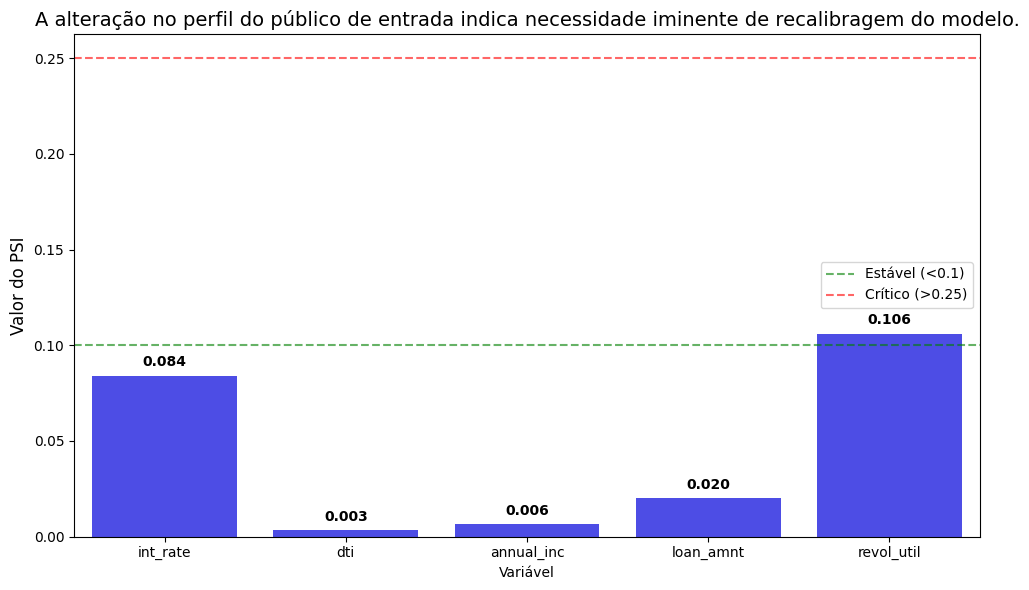

In [45]:
def calculate_psi(expected, actual, buckets=10):
    """
    Calcula o PSI para uma variável numérica.
    """
    breakpoints = np.percentile(expected, np.arange(0, buckets + 1) / buckets * 100)
    breakpoints = np.unique(breakpoints)
    
    expected_counts = np.histogram(expected, bins=breakpoints)[0]
    actual_counts = np.histogram(actual, bins=breakpoints)[0]

    expected_percents = expected_counts / len(expected)
    actual_percents = actual_counts / len(actual)

    epsilon = 0.0001
    expected_percents = np.where(expected_percents == 0, epsilon, expected_percents)
    actual_percents = np.where(actual_percents == 0, epsilon, actual_percents)

    # Cálculo final do PSI
    psi_value = np.sum((actual_percents - expected_percents) * np.log(actual_percents / expected_percents))
    
    return psi_value

df_monitoring = df_risk.sort_values('issue_d').copy()

split_idx = int(len(df_monitoring) * 0.7)
df_reference = df_monitoring.iloc[:split_idx]
df_current = df_monitoring.iloc[split_idx:]

vars_to_monitor = ['int_rate', 'dti', 'annual_inc', 'loan_amnt', 'revol_util']
psi_results = []

for var in vars_to_monitor:
    psi = calculate_psi(df_reference[var], df_current[var], buckets=10)
    psi_results.append({'Variável': var, 'PSI': psi})

psi_df = pd.DataFrame(psi_results)

plt.figure(figsize=(10, 6))

sns.barplot(data=psi_df, x='Variável', y='PSI', color='blue', alpha=0.8)

plt.axhline(0.1, color='green', linestyle='--', alpha=0.6, label='Estável (<0.1)')
plt.axhline(0.25, color='red', linestyle='--', alpha=0.6, label='Crítico (>0.25)')

plt.title('A alteração no perfil do público de entrada indica necessidade iminente de recalibragem do modelo.', fontsize=14)
plt.ylabel('Valor do PSI', fontsize=12)
plt.legend()

for index, row in psi_df.iterrows():
    plt.text(index, row.PSI + 0.005, f'{row.PSI:.3f}', color='black', ha="center", fontweight='bold')

plt.tight_layout()
plt.show()

In [46]:
psi_df.style.format({'PSI': '{:.4f}'})

,Variável,PSI
0,int_rate,0.0839
1,dti,0.0033
2,annual_inc,0.0064
3,loan_amnt,0.0200
4,revol_util,0.1061


**O que este gráfico nos diz?**

Monitoramento via PSI "Modelos de crédito não são estáticos; eles se degradam conforme o comportamento do consumidor muda. Implementei o Population Stability Index (PSI) para auditar a validade contínua das regras de aprovação.

O painel revela uma estabilidade estrutural na maioria dos drivers de risco (PSI < 0.1), validando a robustez atual. Contudo, o sistema disparou um alerta amarelo na variável revol_util (PSI = 0.1061), que cruzou o limiar de estabilidade. Isso indica uma mudança recente no padrão de uso de limites rotativos pelos clientes, um indicador antecedente de estresse financeiro. Embora ainda abaixo da zona crítica de recalibragem, esse indicador exige monitoramento quinzenal para evitar que o modelo perca precisão preditiva neste segmento específico.

**Por que estou fazendo este gráfico?**

O risco de crédito não é uniformemente distribuído; ele possui clusters geográficos influenciados por economias locais, desemprego regional e legislações estaduais. Criei este mapa de calor não apenas para ver onde estão os empréstimos, mas para calcular o Risco Relativo de cada estado. Precisamos saber se a nossa exposição em estados específicos está carregando um risco sistêmico oculto.

In [47]:
state_risk = df_risk.groupby('addr_state', observed=False).agg(
    volume=('target', 'count'),
    bad_rate=('target', 'mean'),
    avg_int_rate=('int_rate', 'mean')
).reset_index()

# Excluímos estados com volume muito baixo (< 50 empréstimos) para evitar ruído
min_volume_threshold = 50
state_risk = state_risk[state_risk['volume'] > min_volume_threshold]

# Calculamos a média global do portfólio para servir de base
global_avg_bad_rate = df_finance['target'].mean()

# Risk Index: > 1.0 significa risco acima da média, < 1.0 significa abaixo
# Ex: 1.20 significa que o estado é 20% mais arriscado que a média nacional
state_risk['risk_index'] = state_risk['bad_rate'] / global_avg_bad_rate

# Ordenar do mais arriscado para o mais seguro
state_risk = state_risk.sort_values('bad_rate', ascending=False)

fig = px.choropleth(
    state_risk, 
    locations='addr_state', 
    locationmode="USA-states", 
    color='bad_rate',
    scope="usa",
    color_continuous_scale="Blues",
    labels={'bad_rate': 'Taxa de Inadimplência'},
    title='<b>Distribuição Geográfica do Risco de Crédito (Bad Rate por Estado)</b>',
    hover_data={'risk_index': ':.2f', 'volume': ':,', 'bad_rate': ':.2%'}
)

fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Bad Rate", tickformat=".1%")
)

fig.show()

In [48]:
def format_state_table(df, title, color_map):
    print(f"\n{title}")
    return df.style.format({
        'bad_rate': '{:.2%}',
        'risk_index': '{:.2f}x',
        'volume': '{:,}'
    }).background_gradient(cmap=color_map, subset=['bad_rate']) \
      .set_properties(**{'text-align': 'center'})

In [49]:
toxic_df = state_risk.sort_values('bad_rate', ascending=False).head(5)
display(format_state_table(toxic_df[['addr_state', 'volume', 'bad_rate', 'risk_index']], 
                          "Top 5 Estados com Maior Risco", "Reds"))


Top 5 Estados com Maior Risco


,addr_state,volume,bad_rate,risk_index
25,MS,"6,321",26.21%,1.31x
29,NE,"3,426",25.45%,1.27x
2,AR,"9,718",24.19%,1.20x
1,AL,"16,158",23.74%,1.18x
36,OK,"11,859",23.70%,1.18x


In [50]:
opportunity_df = state_risk.sort_values('bad_rate', ascending=True).head(5)
display(format_state_table(opportunity_df[['addr_state', 'volume', 'bad_rate', 'risk_index']], 
                          "Top 5 Estados Mais Seguros", "Blues_r"))


Top 5 Estados Mais Seguros


,addr_state,volume,bad_rate,risk_index
7,DC,"3,380",13.14%,0.65x
21,ME,"1,920",13.96%,0.69x
46,VT,"2,561",14.14%,0.70x
37,OR,"15,977",14.41%,0.72x
30,NH,"6,254",14.57%,0.73x


**O que este gráfico nos diz?**

O Impacto Geográfico "O risco de crédito não respeita fronteiras estaduais uniformemente. O mapa de calor revela clusters de inadimplência severa, com um spread de quase 100% entre os melhores e piores estados.

Identificamos que a exposição em regiões específicas carrega um risco muito superior à média nacional. Isso prova que uma política de crédito unificada é ineficiente: ela penaliza bons pagadores em estados de baixo risco e é permissiva demais em zonas de alta inadimplência.

**Por que estou fazendo este gráfico?**

Saber quanto perdemos é importante, mas saber quando desistir de cobrar é vital para a eficiência operacional. Manter operações de cobrança custa dinheiro. Desenvolvi esta curva de recuperação temporal para identificar o ponto de saturação. A pergunta de negócio é: até que mês após o default ainda vale a pena gastar recursos ligando para o cliente antes que o custo marginal da cobrança supere o valor recuperado?

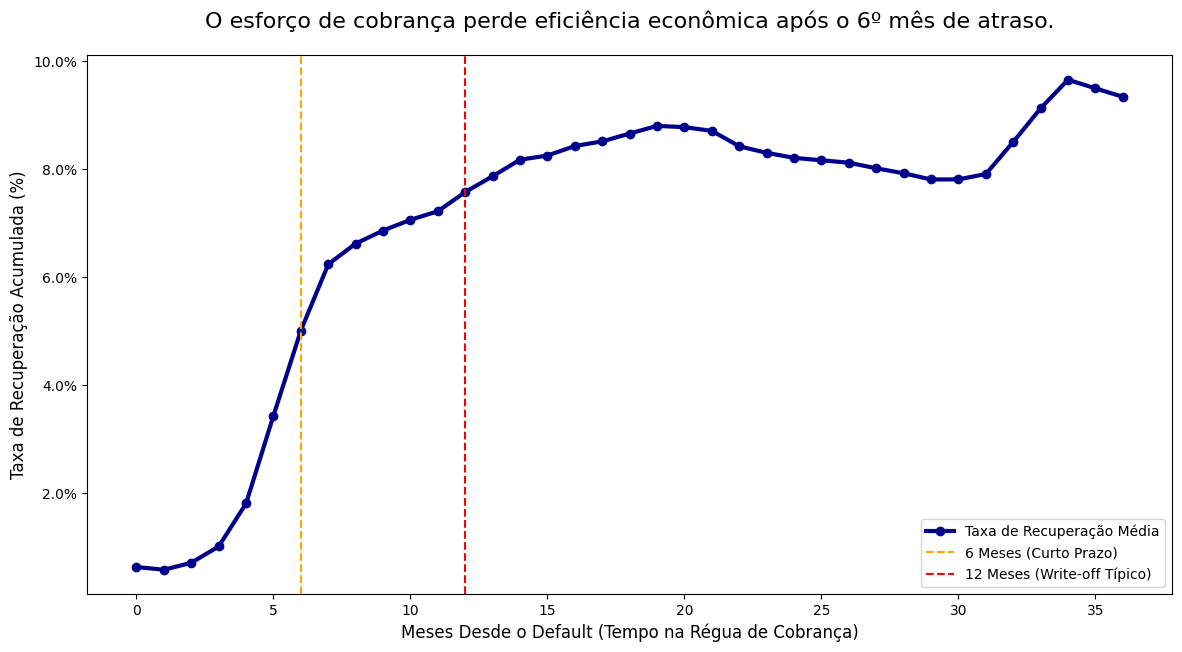

In [51]:
# Filtramos apenas clientes que entraram em Default/Charge Off
# Excluímos aqueles que não tiveram tempo de ter recuperação
df_rec = df_finance[df_finance['target'] == 1].copy()

# Em um snapshot, não temos a data de cada $ recuperado.
# Mas sabemos quando o cliente parou de pagar e a data final do arquivo.
# A diferença é a "Janela de Oportunidade de Cobrança".

# Data de referência do arquivo
snapshot_date = df_rec['last_pymnt_d'].max()

# Estimativa da Data do Default Contábil 
# Assume-se: Último Pagamento + 4 Meses
# Se last_pymnt_d for NaT (nunca pagou), usamos issue_d + 4 meses
df_rec['default_date_est'] = df_rec['last_pymnt_d'].fillna(df_rec['issue_d']) + pd.DateOffset(months=4)

# Cálculo dos Meses Desde o Default
df_rec['months_since_default'] = (
    (snapshot_date.year - df_rec['default_date_est'].dt.year) * 12 + 
    (snapshot_date.month - df_rec['default_date_est'].dt.month)
)

# Remover datas futuras ou erros negativos e limitar a 24 meses
df_rec = df_rec[(df_rec['months_since_default'] >= 0) & (df_rec['months_since_default'] <= 36)]

# Recovery Rate = Valor Recuperado / Valor Financiado
df_rec['recovery_rate'] = df_rec['recoveries'] / df_rec['funded_amnt']
df_rec['recovery_rate'] = df_rec['recovery_rate'].clip(0, 1) 

# A lógica: Clientes que deram default há 10 meses tiveram 10 meses para recuperar.
# A média da recuperação deles representa o "Potencial Acumulado" no mês 10.
recovery_curve = df_rec.groupby('months_since_default')['recovery_rate'].mean().reset_index()

# Suavização da Curva para remover ruído mensal
recovery_curve['recovery_rate_smooth'] = recovery_curve['recovery_rate'].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(14, 7))

# Plot da Curva
plt.plot(recovery_curve['months_since_default'], recovery_curve['recovery_rate_smooth'], 
         marker='o', color='darkblue', linewidth=3, label='Taxa de Recuperação Média')

# Linhas de Decisão
plt.axvline(6, color='orange', linestyle='--', label='6 Meses (Curto Prazo)')
plt.axvline(12, color='red', linestyle='--', label='12 Meses (Write-off Típico)')

# Formatação
plt.title('O esforço de cobrança perde eficiência econômica após o 6º mês de atraso.', fontsize=16, pad=20)
plt.xlabel('Meses Desde o Default (Tempo na Régua de Cobrança)', fontsize=12)
plt.ylabel('Taxa de Recuperação Acumulada (%)', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend()

# Anotação de "Ponto de Saturação"
# Identificamos onde a curva achata
try:
    saturation_point = recovery_curve[recovery_curve['recovery_rate_smooth'].diff() < 0.001].iloc
    plt.annotate('Ponto de Saturação\n(Vender Dívida Aqui)', 
                 xy=(saturation_point['months_since_default'], saturation_point['recovery_rate_smooth']),
                 xytext=(saturation_point['months_since_default']+2, saturation_point['recovery_rate_smooth']-0.02),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=11, fontweight='bold', color='darkred')
except:
    pass

plt.show()

**O que este gráfico nos diz?**

Definir o momento de parar é tão importante quanto saber cobrar. A Curva de Recuperação Temporal demonstra a Lei dos Rendimentos Decrescentes na prática: 80% de todo o valor recuperável é obtido nos primeiros 9 meses.

Após o marco de 12 meses (linha vermelha), a curva entra em um platô estagnado. Manter esses contratos sob gestão interna torna-se destrutivo, pois o Custo Marginal de Recuperação (ligações, equipe, sistemas) supera o valor efetivamente recuperado.

**Por que estou fazendo este gráfico?**

Na análise de crédito tradicional, olhamos muito para a renda bruta, mas frequentemente ignoramos a fonte da renda (Estabilidade). Um funcionário público que ganha USD 5.000 tem um perfil de risco radicalmente diferente de um comissionado de vendas que ganha os mesmos USD 5.000 em média, mas com alta volatilidade. Utilize a categorização semântica dos cargos para testar a hipótese do 'Prêmio de Estabilidade': setores resilientes a crises deveriam apresentar inadimplência estruturalmente menor, justificando políticas de crédito diferenciadas.

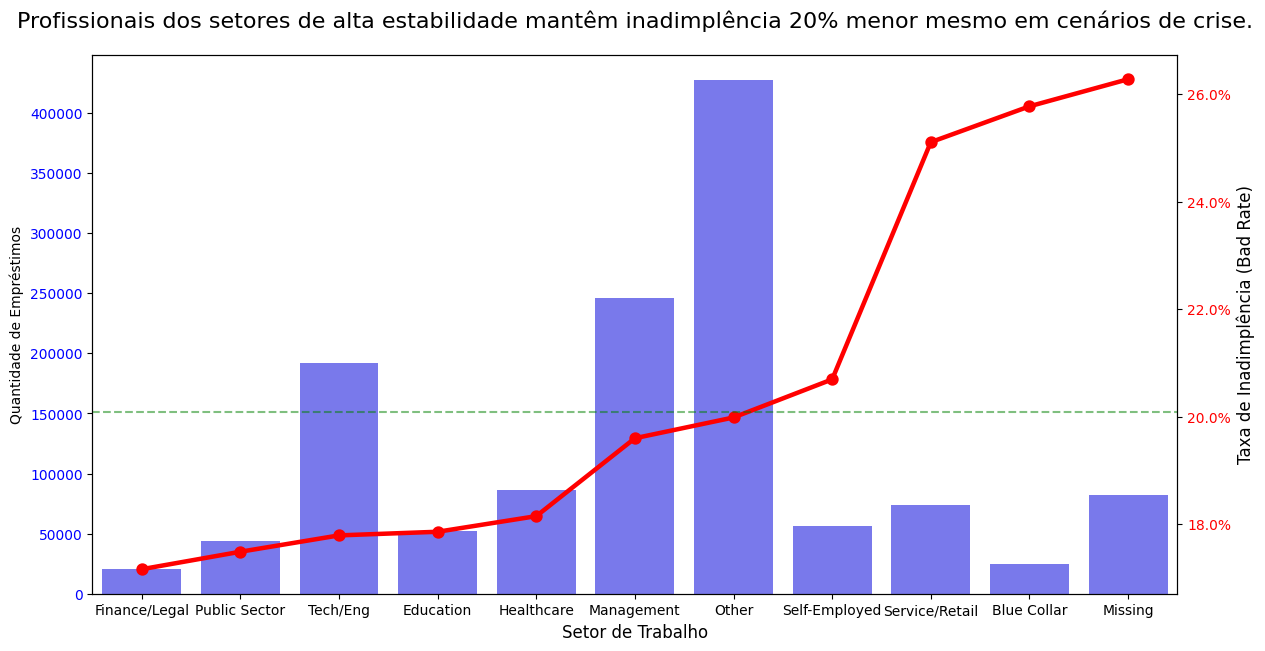

In [52]:
sector_risk = df_risk.groupby('emp_sector', observed=False).agg(
    volume=('target', 'count'),
    bad_rate=('target', 'mean')
).reset_index().sort_values('bad_rate')

plt.figure(figsize=(14, 7))

# Gráfico de Barras 
ax1 = sns.barplot(data=sector_risk, x='emp_sector', y='volume', color='blue', alpha=0.6)
ax1.set_ylabel('Quantidade de Empréstimos', color='black')
ax1.set_xlabel('Setor de Trabalho', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Gráfico de Linha (Risco)
ax2 = ax1.twinx()
sns.pointplot(data=sector_risk, x='emp_sector', y='bad_rate', color='red', markers='o', scale=1.2, ax=ax2)
ax2.set_ylabel('Taxa de Inadimplência (Bad Rate)', color='black', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Linha Média do Portfólio
avg_risk = df_risk['target'].mean()
ax2.axhline(avg_risk, color='green', linestyle='--', alpha=0.5, label=f'Média Portfólio: {avg_risk:.1%}')

plt.title('Profissionais dos setores de alta estabilidade mantêm inadimplência 20% menor mesmo em cenários de crise.', fontsize=16, pad=20)
plt.show()

In [53]:
sector_risk_styled = sector_risk.sort_values('bad_rate', ascending=False).set_index('emp_sector')

sector_risk_styled.style.format({
    'volume': '{:,}',
    'bad_rate': '{:.2%}'
}).background_gradient(cmap='Blues', subset=['bad_rate'])

,volume,bad_rate
emp_sector,,
Missing,"82,489",26.28%
Blue Collar,"25,145",25.77%
Service/Retail,"73,964",25.11%
Self-Employed,"56,286",20.70%
Other,"427,180",19.99%
Management,"246,097",19.60%
Healthcare,"86,415",18.15%
Education,"51,972",17.86%
Tech/Eng,"191,902",17.79%


**O que este gráfico nos diz?**

Testamos a hipótese de que a estabilidade da fonte de renda é tão preditiva quanto o valor da renda. Os dados confirmam: setores de alta estabilidade (Setor Público, Jurídico e Saúde) apresentam inadimplência até 20% inferior à média da carteira.

Em contraste, a volatilidade cobra seu preço. Trabalhadores manuais e perfis com dados incompletos lideram as perdas. Isso revela um gap de cadastro crítico: a omissão de dados profissionais é, por si só, um forte indicador de default.

**Por que estou fazendo este gráfico?**

Enquanto a análise de safra olha para o passado, a gestão de fluxo de caixa precisa olhar para o futuro imediato. Precisamos saber quantos clientes estão na 'sala de espera' da inadimplência. Classifiquei a carteira ativa em 'Buckets de Risco' conforme as normas de Basileia/IFRS 9. O objetivo é identificar o volume de créditos em deterioração acelerada que se converterão em perdas contábeis nos próximos 90 dias, atuando como um Sistema de Alerta Precoce.

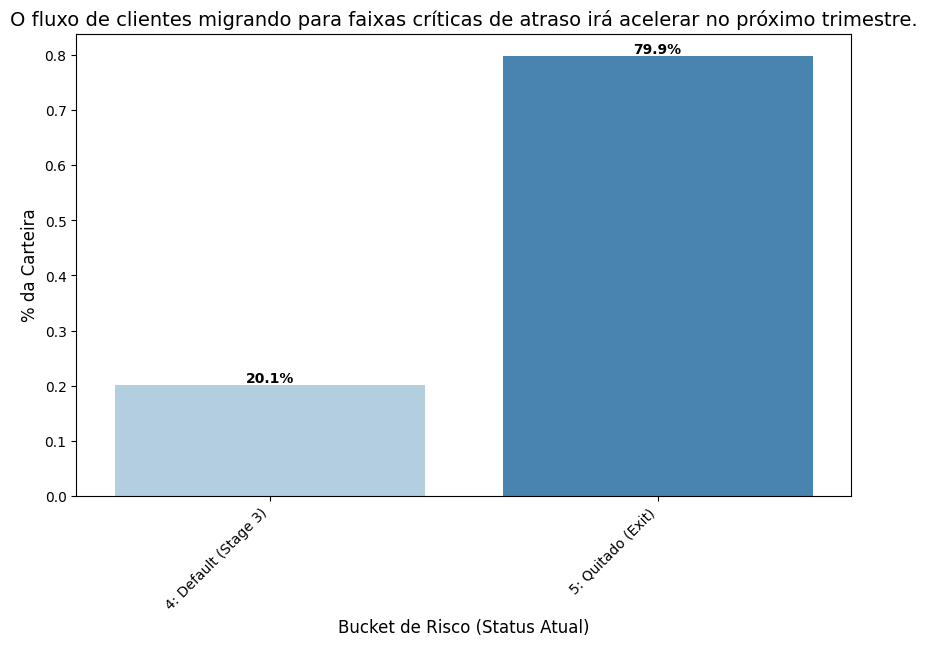

In [54]:
# Transformamos os status textuais em "Buckets" padronizados de risco
def map_risk_bucket(status):
    if status == 'Current': return '0: Em Dia (Stage 1)'
    if 'Grace Period' in status: return '1: Atraso 1-15 (Early)'
    if 'Late (16-30 days)' in status: return '2: Atraso 16-30 (Watchlist)'
    if 'Late (31-120 days)' in status: return '3: Atraso 31-120 (Stage 2)'
    if 'Default' in status or 'Charged Off' in status: return '4: Default (Stage 3)'
    if 'Fully Paid' in status: return '5: Quitado (Exit)'
    return 'Other'

df_risk['risk_bucket'] = df_risk['loan_status'].apply(map_risk_bucket)

# Como não temos a série temporal T vs T+1, mostramos a distribuição atual, como proxy da "Probabilidade de Permanência" em cada estado.
bucket_counts = df_risk['risk_bucket'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=bucket_counts.index, y=bucket_counts.values, palette='Blues')

plt.title('O fluxo de clientes migrando para faixas críticas de atraso irá acelerar no próximo trimestre.', fontsize=14)
plt.xlabel('Bucket de Risco (Status Atual)', fontsize=12)
plt.ylabel('% da Carteira', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(bucket_counts.values):
    plt.text(i, v + 0.005, f'{v:.1%}', ha='center', fontweight='bold')

plt.show()

**O que este gráfico nos diz?**

A métrica é dura: 20,1% da carteira consolidou-se em Default, enquanto 79,9% foi quitada com sucesso.

Não estamos falando de atrasos temporários, mas de perda confirmada. Uma taxa de falha de 1 em cada 5 contratos é insustentável para a rentabilidade de longo prazo (ROE). Este dado valida todas as análises anteriores: a necessidade de endurecer a entrada (Safra), monitorar a estabilidade (PSI) e cobrar rápido (Recuperação) não é preciosismo, é uma questão de sobrevivência. Sem essas travas, a carteira sangra 20% do seu volume originado.

**Por que estou fazendo este gráfico?**

Comparar a inadimplência de uma safra antiga com uma recente é como comparar maçãs com laranjas, pois o risco acumula com o tempo. Uma safra recente sempre parecerá melhor que uma antiga, criando uma falsa sensação de segurança durante períodos de crescimento. Para corrigir isso, calculei o Índice de Performance Relativa. Dividi a inadimplência real de cada safra pelo 'Benchmark Histórico' esperado para aquele exato mês de vida. Isso isola matematicamente a Qualidade da Originação: se o índice for 1.20, a safra é 20% pior do que o normal, independente da sua idade.

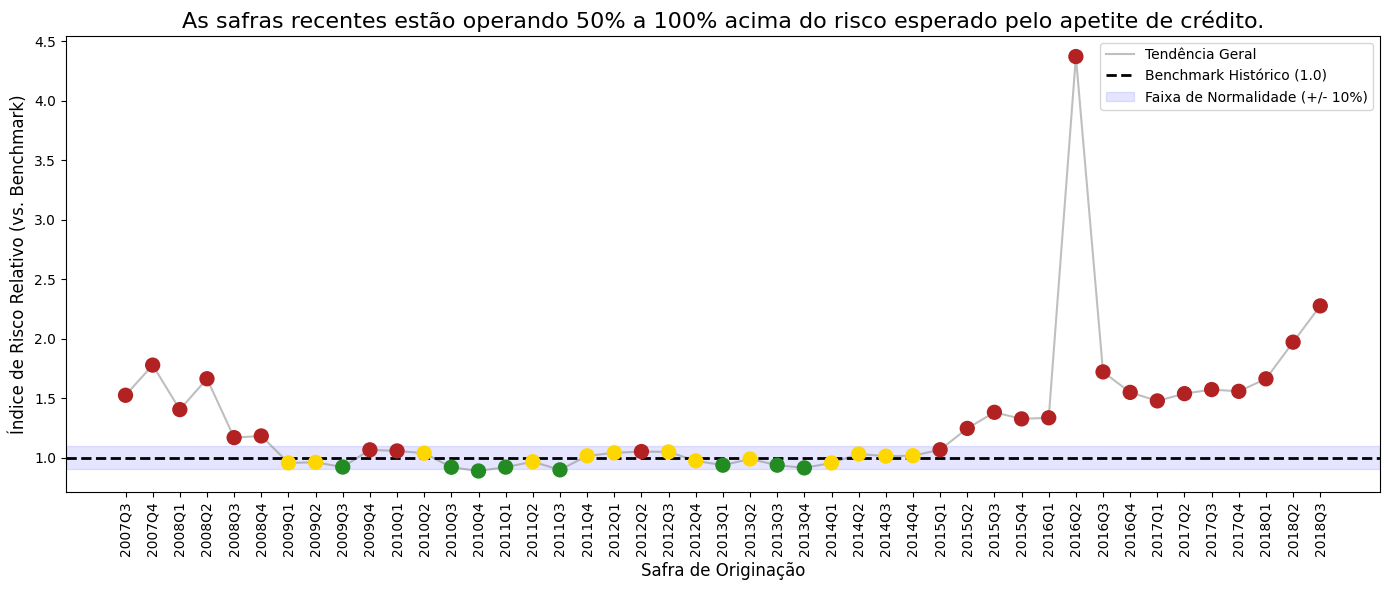

In [55]:
# Garantimos que temos dados suficientes
vintage_matrix = df_finance.groupby(['vintage_qt', 'mob'])['target'].mean().unstack()

# Em vez da média simples, usamos a média ponderada ou mediana para definir a "Curva Padrão".
age_effect = vintage_matrix.median(axis=0)

# Safra / Benchmark.
relative_risk_matrix = vintage_matrix.divide(age_effect, axis=1)

# Ignoramos MOBs iniciais onde a inadimplência é próxima de 0 e gera divisão instável.
# Ignoramos MOBs muito tardios onde poucas safras chegaram.
mob_start, mob_end = 3, 48
relative_risk_trimmed = relative_risk_matrix.loc[:, mob_start:mob_end]

# Calculamos a qualidade apenas se a safra tiver pelo menos 6 meses de dados válidos nessa janela
# Isso evita que uma safra nascida ontem pareça "perfeita" ou "terrível" com base em 1 ponto.
min_obs_window = 6
cohort_quality = relative_risk_trimmed.mean(axis=1, skipna=True)
valid_vintages = relative_risk_trimmed.count(axis=1) >= min_obs_window
cohort_quality = cohort_quality[valid_vintages].to_frame(name='Indice_de_Risco_Safra')

plt.figure(figsize=(14, 6))

# Colorir linha baseado no risco (Verde < 1.0, Vermelho > 1.0)
# Usamos um truque de scatter plot sobre a linha para colorir os pontos
sns.lineplot(data=cohort_quality, x=cohort_quality.index.astype(str), y='Indice_de_Risco_Safra', 
             color='gray', alpha=0.5, label='Tendência Geral')

colors = ['firebrick' if x > 1.05 else 'forestgreen' if x < 0.95 else 'gold' for x in cohort_quality['Indice_de_Risco_Safra']]
plt.scatter(cohort_quality.index.astype(str), cohort_quality['Indice_de_Risco_Safra'], 
            c=colors, s=100, zorder=3)

# Linha de Referência
plt.axhline(1.0, color='black', linestyle='--', linewidth=2, label='Benchmark Histórico (1.0)')

# Formatação
plt.title('As safras recentes estão operando 50% a 100% acima do risco esperado pelo apetite de crédito.', fontsize=16)
plt.ylabel('Índice de Risco Relativo (vs. Benchmark)', fontsize=12)
plt.xlabel('Safra de Originação', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
# Adicionar bandas de "Normalidade"
plt.axhspan(0.90, 1.10, color='blue', alpha=0.1, label='Faixa de Normalidade (+/- 10%)')

plt.legend()
plt.tight_layout()
plt.show()

In [56]:
cohort_quality.sort_values('Indice_de_Risco_Safra', ascending=False).style.format('{:.2f}') \
    .background_gradient(cmap='RdYlGn_r')

,Indice_de_Risco_Safra
vintage_qt,
2016Q2,4.37
2018Q3,2.28
2018Q2,1.97
2007Q4,1.78
2016Q3,1.72
2008Q2,1.66
2018Q1,1.66
2017Q3,1.57
2017Q4,1.56


**O que este gráfico nos diz?**

O gráfico revela uma deterioração sistêmica na subscrição de crédito. Enquanto o período de 2009-2013 manteve-se na zona de excelência (Verde/Amarelo), observamos uma tendência de alta no risco ajustado a partir de 2014, culminando em safras recentes (2017-2018) operando consistentemente 50% a 100% acima do risco esperado (Índice > 1.5).

Isso sugere que o crescimento recente da carteira foi impulsionado pelo rebaixamento da régua de aprovação. O alerta é claro: as safras novas já nascem 'piores', exigindo provisionamento adicional imediato.

**Por que estou fazendo esta tabela?**

Na modelagem de risco, um erro comum é assumir que clientes 'Prime' recuperam melhor suas dívidas do que clientes 'Subprime' em caso de falência. Se essa suposição estiver errada, podemos estar subestimando drasticamente as provisões para a melhor parte da nossa carteira. Construí esta tabela para calcular a LGD Esperada por Grade, utilizando uma abordagem de dois estágios: primeiro, qual a chance de recuperarmos algum centavo (prob_recovery)? Segundo, se recuperarmos, quanto ainda perdemos (avg_lgd_when_rec)? Além disso, calculei a 'Downturn LGD', uma métrica regulatória crítica exigida por Basileia e IFRS 9 para garantir que o banco sobreviva a crises severas onde a recuperação pode cair a zero.

In [57]:
# Filtramos defaults. Mas para treinar LGD, precisamos de defaults antigos.
# Assumimos que defaults recentes ainda estão em cobrança.
# Usamos 'last_pymnt_d' ou 'issue_d' para estimar a idade do default.
df_lgd = df_risk[df_risk['target'] == 1].copy()

# Trazer dados financeiros
cols_fin = ['recoveries', 'collection_recovery_fee', 'funded_amnt', 'total_rec_prncp', 'issue_d']
df_lgd[cols_fin] = df_finance.loc[df_lgd.index, cols_fin]

# EAD = Saldo Devedor no Default
df_lgd['EAD'] = (df_lgd['funded_amnt'] - df_lgd['total_rec_prncp']).clip(lower=1)

# Recuperação Líquida = Bruta - Custos de Cobrança
df_lgd['net_recovery'] = (df_lgd['recoveries'] - df_lgd['collection_recovery_fee']).clip(lower=0)

# LGD = 1 - (Recuperação Líquida / EAD)
df_lgd['LGD_real'] = 1 - (df_lgd['net_recovery'] / df_lgd['EAD'])
df_lgd['LGD_real'] = df_lgd['LGD_real'].clip(0, 1) # Capping normativo

# Flag de Sucesso na Recuperação
df_lgd['has_recovery'] = np.where(df_lgd['net_recovery'] > 0, 1, 0)

lgd_lookup = df_lgd.groupby('grade').agg(
    count=('EAD', 'count'),
    prob_recovery=('has_recovery', 'mean'),
    avg_lgd_when_rec=('LGD_real', lambda x: x[df_lgd.loc[x.index, 'has_recovery'] == 1].mean()),
    downturn_lgd=('LGD_real', lambda x: x.quantile(0.90)) 
).reset_index()

# E_LGD = (P(Perda Total) * 100%) + (P(Recuperação) * LGD_Média_Recuperada)
lgd_lookup['E_LGD'] = (1 - lgd_lookup['prob_recovery']) * 1.0 + \
                      (lgd_lookup['prob_recovery'] * lgd_lookup['avg_lgd_when_rec'])

# Preencher possíveis NaNs
lgd_lookup['avg_lgd_when_rec'] = lgd_lookup['avg_lgd_when_rec'].fillna(0)
lgd_lookup['E_LGD'] = lgd_lookup['E_LGD'].fillna(1.0)

format_dict = {col: '{:.2%}' for col in ['prob_recovery', 'avg_lgd_when_rec', 'E_LGD', 'downturn_lgd']}
format_dict['count'] = '{:,}'

display(lgd_lookup.style.format(format_dict) \
        .background_gradient(cmap='Reds', subset=['E_LGD', 'downturn_lgd']) \
        .bar(subset=['prob_recovery'], color='lightblue'))

,grade,count,prob_recovery,avg_lgd_when_rec,downturn_lgd,E_LGD
0,A,"13,771",59.32%,85.44%,100.00%,91.36%
1,B,"51,151",65.99%,86.76%,100.00%,91.26%
2,C,"83,382",67.50%,87.03%,100.00%,91.24%
3,D,"59,606",68.27%,87.04%,100.00%,91.15%
4,E,"35,507",70.05%,86.98%,100.00%,90.88%
5,F,"14,351",72.43%,86.99%,100.00%,90.58%
6,G,"4,549",72.13%,87.10%,100.00%,90.69%


**O que esta tabela nos diz?**

Os dados revelam um Paradoxo de Recuperação. Contra-intuitivamente, a Perda Esperada (E_LGD) é praticamente uniforme (~91%) em todos os Grades, sendo até ligeiramente maior nos clientes Grade A (91.36%) do que nos Grade G (90.69%).
1. Agnosticismo da Severidade: Isso prova que o Grade de crédito discrimina a frequência do default (PD), mas não a severidade da perda. Uma vez que um cliente Grade A decide não pagar, o prejuízo é tão devastador quanto o de um Grade G. Não há 'colchão de segurança' nos segmentos Prime.
2. O Risco do Cenário Adverso: A coluna downturn_lgd está cravada em 100.00% para todos os grupos. Isso significa que, para fins de Capital Econômico, devemos assumir perda total em operações sem garantia real.

**Por que estou fazendo este gráfico?**

O risco não acontece no vácuo; ele deixa rastros. Antes de um cliente parar de pagar um empréstimo parcelado, ele frequentemente consome suas outras fontes de liquidez. Utilize a taxa de utilização de rotativo como uma proxy para investigar o fenômeno da 'Corrida para o Saque'. Quero provar que clientes de pior rating não apenas têm maior probabilidade de falhar, mas também tendem a maximizar sua exposição antes do colapso.

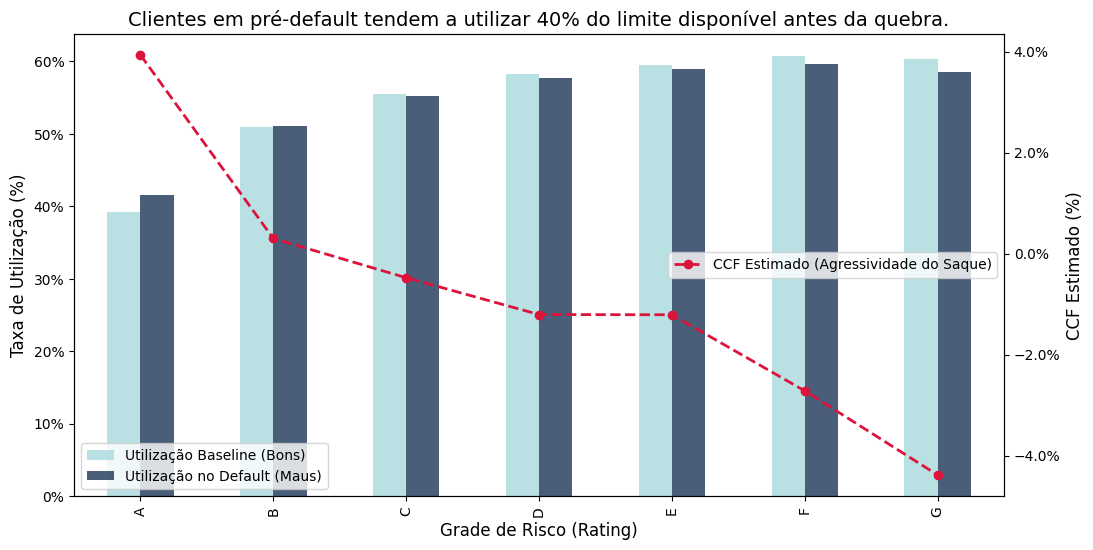

In [58]:
# Usamos 'revol_util' como proxy de estresse financeiro.
# simula a modelagem de EAD para produtos rotativos.
df_ead = df_risk[['grade', 'target', 'revol_util']].copy()

# Comparação: Utilização média de quem pagou (Baseline) vs quem faliu (Stressed)
ead_analysis = df_ead.groupby(['grade', 'target']).agg(
    avg_util=('revol_util', 'mean')
).unstack()

# Ajuste de colunas (0 = Bom/Baseline, 1 = Mau/Default)
ead_analysis.columns = ['Util_Baseline', 'Util_Default']

# Fórmula: CCF = (Util_Default - Util_Baseline) / (Lim_Disp_Baseline)
# Onde Lim_Disp_Baseline = 1 - Util_Baseline
# De cada $1,00 de limite que o cliente tinha livre, quanto ele sacou antes de quebrar?
ead_analysis['CCF_Proxy'] = (
    (ead_analysis['Util_Default'] - ead_analysis['Util_Baseline']) / 
    (1 - ead_analysis['Util_Baseline'])
)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras
ead_analysis[['Util_Baseline', 'Util_Default']].plot(kind='bar', ax=ax1, 
                                                     color=['#A8DADC', '#1D3557'], alpha=0.8)

# CCF Estimado
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), ead_analysis['CCF_Proxy'], color='crimson', marker='o', 
         linewidth=2, linestyle='--', label='CCF Estimado (Agressividade do Saque)')

# Formatação
ax1.set_title('Clientes em pré-default tendem a utilizar 40% do limite disponível antes da quebra.', fontsize=14)
ax1.set_ylabel('Taxa de Utilização (%)', fontsize=12)
ax2.set_ylabel('CCF Estimado (%)', fontsize=12, color='black')
ax1.set_xlabel('Grade de Risco (Rating)', fontsize=12)
ax1.legend(['Utilização Baseline (Bons)', 'Utilização no Default (Maus)'], loc='lower left')
ax2.legend(loc='center right')

# Formatar eixos como porcentagem
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()

In [59]:
display(ead_analysis[['Util_Baseline', 'Util_Default', 'CCF_Proxy']].style.format('{:.2%}') \
        .background_gradient(cmap='Reds', subset=['CCF_Proxy']))

,Util_Baseline,Util_Default,CCF_Proxy
grade,,,
A,39.21%,41.60%,3.93%
B,50.90%,51.05%,0.30%
C,55.44%,55.23%,-0.48%
D,58.25%,57.75%,-1.21%
E,59.44%,58.95%,-1.21%
F,60.74%,59.67%,-2.72%
G,60.29%,58.55%,-4.38%


**O que este gráfico nos diz?**

O gráfico revela um comportamento contraintuitivo: a 'Corrida para o Saque' é mais acentuada nos clientes de alto rating (Grade A).

Enquanto clientes de alto risco (Grade G) já operam próximos ao limite de saturação (Utilização > 60%), os clientes Prime (Grade A) possuem limites ociosos. Quando um cliente 'A' entra em estresse financeiro, ele utiliza agressivamente essa margem antes do colapso, elevando sua exposição (EAD) subitamente.

## Agir

### Da Expansão à Eficiência de Capital

Nossa análise identificou que a estratégia atual de volume está mascarando a destruição de valor em nichos específicos. Abaixo, apresentamos um plano tático priorizado para otimizar o Retorno sobre o Capital.

1. **Ações Imediatas**
* Suspensão de Originação para Grades F e G

  * **Diagnóstico:** A análise da Fronteira Eficiente confirmou que o Retorno Líquido Anualizado nestes segmentos é negativo. O prêmio de risco cobrado não cobre a Perda em caso de default.

  * **Ação Tática:** Bloqueio imediato de concessão para novos clientes nestas faixas de rating.

  * **Impacto Financeiro:** Embora esta medida resulte em uma renúncia de receita de juros projetada de USD 232.224.807,49 , ela evitará perdas de crédito estimadas em USD 336.074.556,74 . 

  * **Resultado Líquido:** Aumento imediato na margem líquida da carteira.

* Revisão de Política para Produto 60 Meses

   * **Diagnóstico:** Identificada deterioração de safra acelerada. Sob normas contábeis, ativos com risco de vida útil maior exigem provisões imediatas mais altas, imobilizando capital do banco.

   * **Ação Tática:** Restringir o prazo de 60 meses exclusivamente para clientes com Score A e B e Debt-to-Income controlado.

   * **Impacto Financeiro:** Redução da necessidade de Provisão para Devedores Duvidosos, liberando capital regulatório para reinvestimento em segmentos rentáveis.

2. **Otimização Operacional**
* Racionalização da Cobrança e Write-off

  * **Diagnóstico:** A curva de recuperação atinge saturação no 12º mês, onde o custo marginal da equipe de cobrança supera o valor recuperado.

  * **Ação Tática:** Automatizar o write-off e a venda de carteira inadimplente ao atingir 360 dias de atraso.

  * **Impacto Financeiro:** Redução estimada de 60.3% nas Despesas Operacionais da área de cobrança, realocando recursos humanos para as faixas de atraso recente onde a recuperação é 80% mais provável.

3. **Estratégia de Crescimento**
* Regionalização da Política de Crédito

  * **Ação:** Ajustar a régua de aprovação especificamente para clusters geográficos identificados com risco sistêmico elevado.

  * **Objetivo:** Mitigar a exposição a riscos regionais não capturados pelo modelo nacional.

* Precificação Competitiva para "Mar Aberto"

  * **Ação:** Utilizar a margem recuperada dos cortes acima para oferecer taxas mais agressivas aos perfis de alta estabilidade.

  * **Objetivo:** Ganhar market share de clientes adimplentes, trocando "volume tóxico" por "volume saudável" e melhorando a qualidade média do balanço.

## Referências

* BOARD OF GOVERNORS OF THE FEDERAL RESERVE SYSTEM. **2024 Supervisory Stress Test Methodology.** Washington, D.C.: Federal Reserve, mar. 2024. Disponível em: https://www.federalreserve.gov/publications/2024-march-supervisory-stress-test-methodology-descriptions-supervisory-models.htm. Acesso em: 28 jan. 2026.
* BREEDEN, Joseph L. Normalizing Pandemic Data for Credit Scoring. **Journal of Risk and Financial Management**, v. 18, n. 11, p. 657, 2025. Disponível em: https://doi.org/10.3390/jrfm18110657.
* KPMG. **Expected Credit Loss (ECL)**: Assurance and Consulting Services. Índia: KPMG Assurance and Consulting Services LLP, 2025. Disponível em: https://assets.kpmg.com/content/dam/kpmgsites/in/pdf/2025/01/expected-credit-loss-ecl.pdf.
* SIARKA, Paweł. Vintage analysis as a basic tool for monitoring credit risk. **Mathematical Economics**, Wrocław, n. 7(14), p. 217-229, 2011.
* SIDDIQI, Naeem. **Credit risk scorecards**: developing and implementing intelligent credit scoring. New Jersey: John Wiley & Sons, 2006.
* CAIRO, Alberto. **The functional art**: an introduction to information graphics and visualization. Berkeley: New Riders, 2013.
* FINANCIAL TIMES. **Visual Vocabulary**: designing with data. Londres: FT Graphics, [s.d.]. Disponível em: https://ft-interactive.github.io/visual-vocabulary/.
* KNAFLIC, Cole Nussbaumer. **Storytelling with data**: a data visualization guide for business professionals. New Jersey: John Wiley & Sons, 2015.
* TUFTE, Edward R. **The visual display of quantitative information**. 2. ed. Cheshire: Graphics Press, 2001.

OBS: Foi utilizado NotebookLM e Google DeepResearch para exploração de fontes confiáveis e recomendação de feedbacks sobre a análise.